In [2]:
from cohlib.utils import pickle_open
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [9]:
def plot_jvo(jax_output, old_output, pltlim, suptitle, showyx=True):
    if pltlim is None:
        all_output = jnp.concatenate([jax_output.real, jax_output.imag, 
            old_output.real, old_output.imag])
        pltlim = all_output.max() * 1.2

    yxline = jnp.linspace(-pltlim, pltlim, 100)
    fig, ax = plt.subplots(1,2, figsize=(8,3))
    ax[0].plot(jax_output.real, old_output.real, '.')
    ax[0].set_title('Real')

    ax[1].plot(jax_output.imag, old_output.imag, '.')
    ax[1].set_title('Imag')

    for i in range(2):
        ax[i].set_xlim([-pltlim, pltlim])
        ax[i].set_ylim([-pltlim, pltlim])
        if showyx is True:
            ax[i].plot(yxline, yxline, 'k')
        ax[i].set_xlabel('Jax')
        ax[i].set_ylabel('Old')

    fig.suptitle(suptitle)
    plt.tight_layout()

In [16]:
def plot_res(ov2):
    seed = 7
    res = pickle_open(f'ts_output/{ov2}_{seed}_flatinit_mus.pickle')
    plim = 10
    # plim = None
    trial = 0 
    k = 0

    jax_mus = res['jax'].mus[:,k,trial]
    old_mus = res['old'].mus[:,k,trial]
    obs = res['obs']
    zs = res['zs_true']
    nz = jnp.arange(50)

    plot_jvo(jax_mus, old_mus, plim, f'Estimated Zs trial {trial}; unit {k}, obs_var 1e{ov2}')
    fig, ax = plt.subplots(figsize=(5,2))
    ax.plot(obs[:,k,trial])
    ax.set_xlabel('Time')
    ax.set_title(f'Observations trial {trial}; unit{k}; obs_var 1e{ov2}')

    fig, ax = plt.subplots(2,1,figsize=(5,4))

    ax[0].plot(zs[nz,k,trial].real, color='k', label='True')
    ax[0].plot(jax_mus.real, label='Jax')
    ax[0].plot(old_mus.real, label='Old')
    ax[0].set_title(f'Real')
    ax[0].legend()

    ax[1].plot(zs[nz,k,trial].imag, color='k', label='True')
    ax[1].plot(jax_mus.imag, label='Jax')
    ax[1].plot(old_mus.imag, label='Old')
    ax[1].set_title(f'Imag')
    plt.tight_layout()

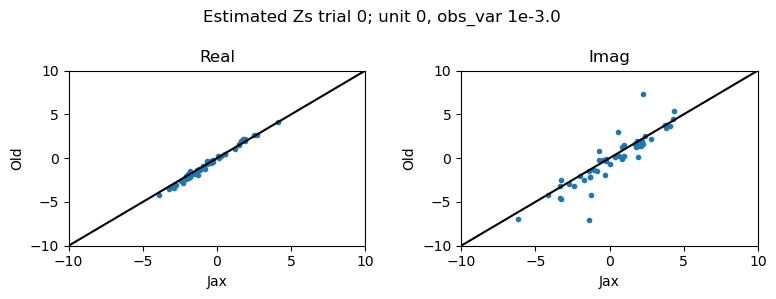

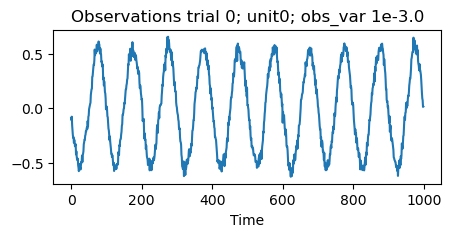

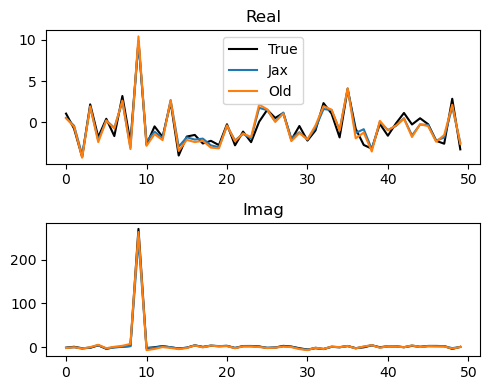

In [17]:
plot_res(-3.0)

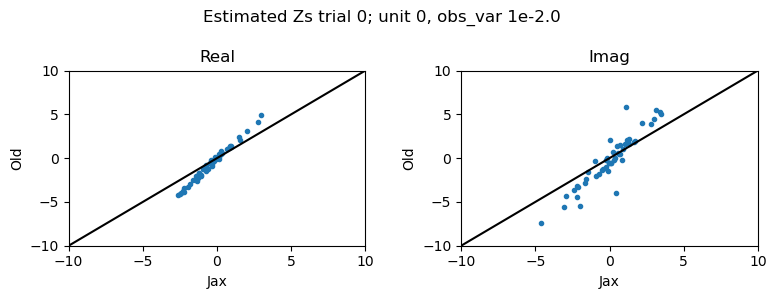

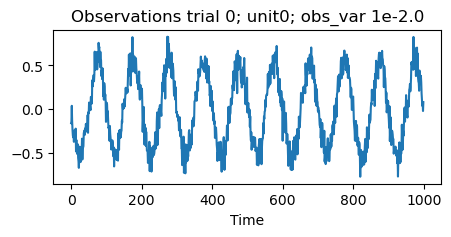

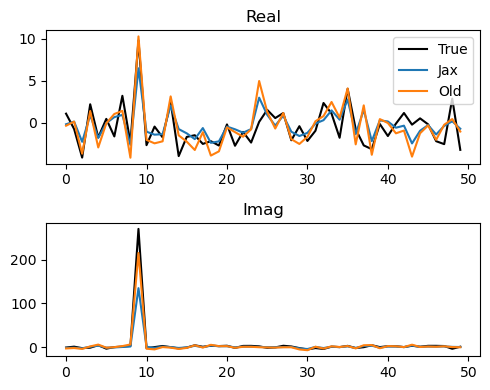

In [18]:
plot_res(-2.0)

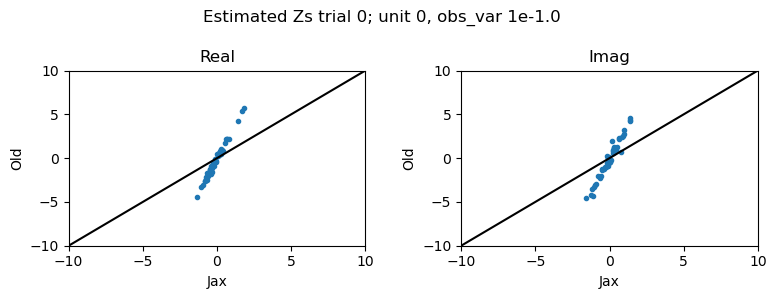

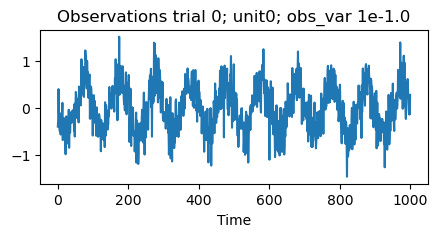

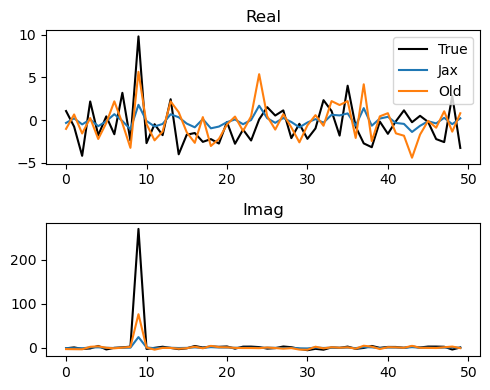

In [19]:
plot_res(-1.0)

So script is reproducing what we previously did in notebook - we can now debug

What we saw previously is that the cost function started out looking the same, but diverged *for the same zs*


In [25]:
ov2 = -3.0
seed = 7
res = pickle_open(f'ts_output/{ov2}_{seed}_flatinit_mus.pickle')

In [27]:
jax_exp = res['jax']
old_exp = res['old']
num_iters = len(old_exp.track_data[0].track_zs) 
k = 0

trial = 0
for r in range(num_iters):
    zs_use = old_exp.track_data[trial].track_zs[r]
    # old_r = old_exp.track_data[trial].track_grad[r]
    jax_r, _, _ = jax_exp.eval_cost(trial, zs_use)
    old_r, _, _ = old_exp.eval_cost(trial, zs_use)
    print(f' jax cost: {jax_r.real}, old cost: {old_r.real} jax/old: {jax_r.real / old_r.real}')

# num_rows = 2
# num_cols = 5
# fig, ax = plt.subplots(num_rows, num_cols, figsize=(12,4))
# for r in range(num_iters):
#     i = jnp.floor((r) / num_cols).astype(int)
#     j = r % num_cols
#     zs_use = old_exp.track_data[trial].track_zs[r]
#     ax[i,j].plot(zs_use[:,k].real, color='tab:blue')
#     ax[i,j].plot(zs_use[:,k].imag, color='tab:red')
#     # ax[i,j].set_xlim([-plim,plim])
#     # ax[i,j].set_ylim([-plim,plim])
#     if i == num_rows - 1:
#         ax[i,j].set_xlabel('Freq')
#     # if j == 0: 
#     #     ax[i,j].set_ylabel('Old')
# fig.suptitle('Old zs')
# plt.tight_layout()

# plim = 20
# fig, ax = plt.subplots(num_rows, num_cols, figsize=(12,4))
# for r in range(num_iters):
#     i = jnp.floor((r) / num_cols).astype(int)
#     j = r % num_cols
#     zs_use = old_exp.track_data[trial].track_zs[r]
#     ax[i,j].plot(zs_use[:,k].real, color='tab:blue')
#     ax[i,j].plot(zs_use[:,k].imag, color='tab:red')
#     ax[i,j].set_ylim([-plim,plim])
#     if i == num_rows - 1:
#         ax[i,j].set_xlabel('Freq')
#     # if j == 0: 
#     #     ax[i,j].set_ylabel('Old')
# fig.suptitle('Old zs')
# plt.tight_layout()

 jax cost: 972736.4375, old cost: 972736.4375 jax/old: 1.0
 jax cost: 278988.375, old cost: 261800.53125 jax/old: 1.0656524896621704
 jax cost: 123483.625, old cost: 84091.7578125 jax/old: 1.4684391021728516
 jax cost: 93521.4375, old cost: 39600.8046875 jax/old: 2.3616044521331787
 jax cost: 90491.984375, old cost: 28437.3671875 jax/old: 3.1821506023406982
 jax cost: 91973.484375, old cost: 25627.51953125 jax/old: 3.5888562202453613
 jax cost: 93468.8203125, old cost: 24917.205078125 jax/old: 3.751175880432129
 jax cost: 94408.171875, old cost: 24736.5703125 jax/old: 3.816542387008667
 jax cost: 94927.53125, old cost: 24690.251953125 jax/old: 3.8447372913360596
 jax cost: 95200.59375, old cost: 24678.236328125 jax/old: 3.8576741218566895
 jax cost: 95340.96875, old cost: 24675.078125 jax/old: 3.863856792449951


In [46]:
zold0 = jnp.array([ 0.48444247-1.7705261e+00j, -0.42243177-2.1996696e-01j,
       -3.6990693 -2.7920246e+00j,  1.7499666 -1.6310084e-01j,
       -2.0424597 +4.7102561e+00j,  0.23403351-2.2067931e+00j,
       -0.59313816+6.7327911e-01j,  2.355223  +2.6533947e+00j,
       -2.7813516 +6.4005995e+00j,  9.159798  +2.3096890e+02j,
       -2.4371846 -6.2076087e+00j, -1.1987361 -3.6602843e+00j,
       -1.8350662 +1.0846233e-01j,  2.3796704 -1.6914122e+00j,
       -2.9826772 -4.0722795e+00j, -1.8089442 -1.9112148e+00j,
       -2.040705  +3.2131863e+00j, -1.9122311 -5.5877751e-01j,
       -2.627986  +3.0171738e+00j, -2.7064257 +1.4473354e+00j,
       -0.2770056 +1.8765631e+00j, -1.9553475 -2.2307932e+00j,
       -1.1226339 +1.3260574e+00j, -1.517257  +1.2518231e+00j,
        1.9310181 +1.8525830e-01j,  1.4281898 -1.9095215e+00j,
        0.093653  -1.2528079e+00j,  0.988739  +1.1151221e+00j,
       -1.943162  -4.7752593e-02j, -1.0837874 -3.9395938e+00j,
       -1.764956  -6.0493097e+00j, -0.28668013-1.2967783e+00j,
        1.7596943 -3.7307501e+00j,  1.3939228 +1.1001440e+00j,
       -0.80343866-9.6130259e-02j,  3.6723895 +2.1918960e+00j,
       -1.6407453 -2.5408528e+00j, -1.0364648 +1.3029206e+00j,
       -3.0394151 +3.9291279e+00j,  0.20933867-1.1874713e+00j,
       -0.79816   +1.7652850e+00j, -0.2901111 +1.4298161e+00j,
        0.43595815-2.5698069e-01j, -1.5056461 +3.3393345e+00j,
       -0.15616882+2.3129195e-01j, -0.347168  +1.7321047e+00j,
       -2.0063024 +1.3445743e+00j, -1.3032203 +1.2020965e+00j,
        1.9161116 -2.8259654e+00j, -2.2274885 +9.0882450e-02j],
      dtype=complex)

xold0 = jnp.array([-7.63774887e-02, -1.02858432e-01, -1.27219513e-01, -1.49463236e-01,
       -1.69720113e-01, -1.88234270e-01, -2.05340013e-01, -2.21432164e-01,
       -2.36931577e-01, -2.52249360e-01, -2.67751634e-01, -2.83728659e-01,
       -3.00368905e-01, -3.17742109e-01, -3.35789472e-01, -3.54324877e-01,
       -3.73044610e-01, -3.91544640e-01, -4.09346074e-01, -4.25925165e-01,
       -4.40745264e-01, -4.53290880e-01, -4.63099182e-01, -4.69787657e-01,
       -4.73077178e-01, -4.72807705e-01, -4.68946487e-01, -4.61589336e-01,
       -4.50953126e-01, -4.37362552e-01, -4.21230525e-01, -4.03034598e-01,
       -3.83289844e-01, -3.62521678e-01, -3.41237992e-01, -3.19904327e-01,
       -2.98921376e-01, -2.78607816e-01, -2.59187251e-01, -2.40781426e-01,
       -2.23409548e-01, -2.06991762e-01, -1.91359416e-01, -1.76268592e-01,
       -1.61417782e-01, -1.46467850e-01, -1.31063730e-01, -1.14856184e-01,
       -9.75228846e-02, -7.87875950e-02, -5.84365614e-02, -3.63312587e-02,
       -1.24169551e-02,  1.32732810e-02,  4.06192951e-02,  6.94192648e-02,
        9.93991047e-02,  1.30225703e-01,  1.61522865e-01,  1.92889243e-01,
        2.23916635e-01,  2.54208058e-01,  2.83394903e-01,  3.11150402e-01,
        3.37200940e-01,  3.61332834e-01,  3.83394688e-01,  4.03296351e-01,
        4.21002746e-01,  4.36524898e-01,  4.49908942e-01,  4.61222142e-01,
        4.70540226e-01,  4.77933794e-01,  4.83457893e-01,  4.87143785e-01,
        4.88994062e-01,  4.88981605e-01,  4.87052977e-01,  4.83134389e-01,
        4.77141678e-01,  4.68991190e-01,  4.58612740e-01,  4.45962012e-01,
        4.31030899e-01,  4.13856655e-01,  3.94526601e-01,  3.73179436e-01,
        3.50003123e-01,  3.25227261e-01,  2.99113542e-01,  2.71942765e-01,
        2.44000390e-01,  2.15561688e-01,  1.86878026e-01,  1.58164799e-01,
        1.29592806e-01,  1.01283208e-01,  7.33066350e-02,  4.56866845e-02,
        1.84071679e-02, -8.57755076e-03, -3.53300013e-02, -6.19159006e-02,
       -8.83909687e-02, -1.14788927e-01, -1.41112238e-01, -1.67325661e-01,
       -1.93354234e-01, -2.19084501e-01, -2.44369522e-01, -2.69037038e-01,
       -2.92899221e-01, -3.15764159e-01, -3.37446511e-01, -3.57776761e-01,
       -3.76608998e-01, -3.93825442e-01, -4.09337044e-01, -4.23081815e-01,
       -4.35019523e-01, -4.45124805e-01, -4.53378081e-01, -4.59757715e-01,
       -4.64231730e-01, -4.66753364e-01, -4.67258096e-01, -4.65665162e-01,
       -4.61882889e-01, -4.55816805e-01, -4.47381198e-01, -4.36512291e-01,
       -4.23181981e-01, -4.07410264e-01, -3.89275551e-01, -3.68921101e-01,
       -3.46556664e-01, -3.22454512e-01, -2.96940327e-01, -2.70377547e-01,
       -2.43149489e-01, -2.15636715e-01, -1.88193664e-01, -1.61126643e-01,
       -1.34673655e-01, -1.08989388e-01, -8.41358081e-02, -6.00805357e-02,
       -3.67022343e-02, -1.38039878e-02,  8.86694901e-03,  3.15939672e-02,
        5.46626411e-02,  7.83311799e-02,  1.02802351e-01,  1.28198877e-01,
        1.54545143e-01,  1.81755781e-01,  2.09633589e-01,  2.37875909e-01,
        2.66089827e-01,  2.93814480e-01,  3.20550025e-01,  3.45789224e-01,
        3.69050115e-01,  3.89907926e-01,  4.08021182e-01,  4.23153847e-01,
        4.35187191e-01,  4.44124252e-01,  4.50085104e-01,  4.53293145e-01,
        4.54054296e-01,  4.52731073e-01,  4.49713022e-01,  4.45386946e-01,
        4.40108001e-01,  4.34176624e-01,  4.27818656e-01,  4.21175092e-01,
        4.14297730e-01,  4.07153487e-01,  3.99635315e-01,  3.91578048e-01,
        3.82779390e-01,  3.73020530e-01,  3.62088680e-01,  3.49795401e-01,
        3.35992336e-01,  3.20580959e-01,  3.03517103e-01,  2.84810215e-01,
        2.64516413e-01,  2.42729157e-01,  2.19566271e-01,  1.95157111e-01,
        1.69629961e-01,  1.43102393e-01,  1.15675122e-01,  8.74303505e-02,
        5.84345907e-02,  2.87457108e-02, -1.57665368e-03, -3.24587561e-02,
       -6.38000593e-02, -9.54619348e-02, -1.27259403e-01, -1.58957258e-01,
       -1.90271676e-01, -2.20877573e-01, -2.50421166e-01, -2.78538138e-01,
       -3.04874092e-01, -3.29107285e-01, -3.50970626e-01, -3.70270461e-01,
       -3.86901379e-01, -4.00853604e-01, -4.12214071e-01, -4.21158165e-01,
       -4.27934825e-01, -4.32844460e-01, -4.36212361e-01, -4.38358843e-01,
       -4.39569980e-01, -4.40070450e-01, -4.40002114e-01, -4.39409345e-01,
       -4.38233554e-01, -4.36317533e-01, -4.33418930e-01, -4.29232955e-01,
       -4.23420936e-01, -4.15644407e-01, -4.05599743e-01, -3.93051118e-01,
       -3.77859294e-01, -3.60002041e-01, -3.39585841e-01, -3.16845804e-01,
       -2.92135447e-01, -2.65904546e-01, -2.38669828e-01, -2.10977331e-01,
       -1.83362812e-01, -1.56311527e-01, -1.30221441e-01, -1.05373517e-01,
       -8.19112659e-02, -5.98313548e-02, -3.89867462e-02, -1.91017743e-02,
        2.01871619e-04,  1.93704125e-02,  3.88773568e-02,  5.91803007e-02,
        8.06792825e-02,  1.03679046e-01,  1.28360063e-01,  1.54758766e-01,
        1.82759911e-01,  2.12101430e-01,  2.42389619e-01,  2.73126096e-01,
        3.03740680e-01,  3.33629847e-01,  3.62195879e-01,  3.88884217e-01,
        4.13215101e-01,  4.34807688e-01,  4.53394949e-01,  4.68827426e-01,
        4.81067657e-01,  4.90175366e-01,  4.96285468e-01,  4.99581903e-01,
        5.00269651e-01,  4.98548418e-01,  4.94590580e-01,  4.88525271e-01,
        4.80430543e-01,  4.70333725e-01,  4.58220810e-01,  4.44051296e-01,
        4.27779317e-01,  4.09376919e-01,  3.88855845e-01,  3.66287678e-01,
        3.41816992e-01,  3.15667003e-01,  2.88137048e-01,  2.59589255e-01,
        2.30428711e-01,  2.01075688e-01,  1.71933874e-01,  1.43357724e-01,
        1.15621619e-01,  8.88944417e-02,  6.32226393e-02,  3.85235772e-02,
        1.45908883e-02, -8.88832845e-03, -3.23049910e-02, -5.60905524e-02,
       -8.06734413e-02, -1.06432840e-01, -1.33654237e-01, -1.62490383e-01,
       -1.92932189e-01, -2.24791408e-01, -2.57698268e-01, -2.91114181e-01,
       -3.24359089e-01, -3.56652528e-01, -3.87163907e-01, -4.15069371e-01,
       -4.39610153e-01, -4.60147917e-01, -4.76211518e-01, -4.87533122e-01,
       -4.94068444e-01, -4.95999992e-01, -4.93724108e-01, -4.87819821e-01,
       -4.79005516e-01, -4.68082786e-01, -4.55876440e-01, -4.43171263e-01,
       -4.30653572e-01, -4.18860942e-01, -4.08144772e-01, -3.98647457e-01,
       -3.90297920e-01, -3.82823378e-01, -3.75777960e-01, -3.68584067e-01,
       -3.60585243e-01, -3.51102531e-01, -3.39493364e-01, -3.25205147e-01,
       -3.07821274e-01, -2.87095249e-01, -2.62969404e-01, -2.35579282e-01,
       -2.05241978e-01, -1.72430590e-01, -1.37737170e-01, -1.01828106e-01,
       -6.53952509e-02, -2.91078147e-02,  6.43173512e-03,  4.07234654e-02,
        7.33953863e-02,  1.04216464e-01,  1.33097023e-01,  1.60076723e-01,
        1.85302764e-01,  2.08999366e-01,  2.31433541e-01,  2.52878904e-01,
        2.73582250e-01,  2.93734938e-01,  3.13451678e-01,  3.32759678e-01,
        3.51595730e-01,  3.69814306e-01,  3.87203157e-01,  4.03505117e-01,
        4.18443382e-01,  4.31748301e-01,  4.43181425e-01,  4.52556133e-01,
        4.59751278e-01,  4.64718521e-01,  4.67480302e-01,  4.68122393e-01,
        4.66778874e-01,  4.63613570e-01,  4.58799273e-01,  4.52497244e-01,
        4.44839060e-01,  4.35913563e-01,  4.25759375e-01,  4.14364070e-01,
        4.01670605e-01,  3.87588799e-01,  3.72012466e-01,  3.54838341e-01,
        3.35986137e-01,  3.15416038e-01,  2.93143719e-01,  2.69248039e-01,
        2.43873566e-01,  2.17225552e-01,  1.89557970e-01,  1.61156863e-01,
        1.32318974e-01,  1.03329420e-01,  7.44397491e-02,  4.58492488e-02,
        1.76914800e-02, -9.97249968e-03, -3.71530205e-02, -6.39229119e-02,
       -9.04015005e-02, -1.16732471e-01, -1.43058702e-01, -1.69495299e-01,
       -1.96104765e-01, -2.22876027e-01, -2.49710485e-01, -2.76415676e-01,
       -3.02709252e-01, -3.28231573e-01, -3.52566630e-01, -3.75271320e-01,
       -3.95907164e-01, -4.14074659e-01, -4.29446489e-01, -4.41794544e-01,
       -4.51010674e-01, -4.57117647e-01, -4.60268319e-01, -4.60734934e-01,
       -4.58887100e-01, -4.55161333e-01, -4.50024575e-01, -4.43934441e-01,
       -4.37300116e-01, -4.30447370e-01, -4.23590690e-01, -4.16815579e-01,
       -4.10071582e-01, -4.03178662e-01, -3.95845085e-01, -3.87694716e-01,
       -3.78303587e-01, -3.67240667e-01, -3.54108870e-01, -3.38584900e-01,
       -3.20451111e-01, -2.99619675e-01, -2.76143909e-01, -2.50218302e-01,
       -2.22165048e-01, -1.92410082e-01, -1.61449268e-01, -1.29809171e-01,
       -9.80052873e-02, -6.65018186e-02, -3.56765985e-02, -5.79504576e-03,
        2.30052751e-02,  5.07172905e-02,  7.74541050e-02,  1.03426985e-01,
        1.28913209e-01,  1.54216990e-01,  1.79627195e-01,  2.05375627e-01,
        2.31600195e-01,  2.58316576e-01,  2.85400152e-01,  3.12582672e-01,
        3.39461118e-01,  3.65520686e-01,  3.90169173e-01,  4.12779689e-01,
        4.32738811e-01,  4.49495345e-01,  4.62605447e-01,  4.71770674e-01,
        4.76864517e-01,  4.77946669e-01,  4.75260943e-01,  4.69219536e-01,
        4.60373223e-01,  4.49370563e-01,  4.36908424e-01,  4.23680127e-01,
        4.10322249e-01,  3.97367865e-01,  3.85208040e-01,  3.74064565e-01,
        3.63977522e-01,  3.54807854e-01,  3.46253365e-01,  3.37878823e-01,
        3.29156101e-01,  3.19510669e-01,  3.08371425e-01,  2.95219094e-01,
        2.79629469e-01,  2.61307567e-01,  2.40110844e-01,  2.16059729e-01,
        1.89334482e-01,  1.60259947e-01,  1.29279241e-01,  9.69194621e-02,
        6.37526587e-02,  3.03551871e-02, -2.73044594e-03, -3.50285955e-02,
       -6.61555156e-02, -9.58346874e-02, -1.23901881e-01, -1.50300041e-01,
       -1.75064921e-01, -1.98303893e-01, -2.20170170e-01, -2.40834936e-01,
       -2.60461301e-01, -2.79181004e-01, -2.97078192e-01, -3.14179122e-01,
       -3.30450743e-01, -3.45806956e-01, -3.60120118e-01, -3.73239636e-01,
       -3.85011673e-01, -3.95299137e-01, -4.04000700e-01, -4.11064237e-01,
       -4.16494578e-01, -4.20354784e-01, -4.22758877e-01, -4.23858970e-01,
       -4.23826098e-01, -4.22827512e-01, -4.21002775e-01, -4.18441385e-01,
       -4.15163547e-01, -4.11107570e-01, -4.06124204e-01, -3.99980277e-01,
       -3.92371088e-01, -3.82940680e-01, -3.71309012e-01, -3.57104003e-01,
       -3.39994937e-01, -3.19726437e-01, -2.96146840e-01, -2.69231439e-01,
       -2.39097163e-01, -2.06006706e-01, -1.70362487e-01, -1.32690057e-01,
       -9.36123282e-02, -5.38162664e-02, -1.40146930e-02,  2.50939075e-02,
        6.28646463e-02,  9.87415761e-02,  1.32286385e-01,  1.63198456e-01,
        1.91325292e-01,  2.16661811e-01,  2.39339873e-01,  2.59608626e-01,
        2.77807236e-01,  2.94332445e-01,  3.09603572e-01,  3.24028134e-01,
        3.37968975e-01,  3.51717383e-01,  3.65472198e-01,  3.79326671e-01,
        3.93263996e-01,  4.07160252e-01,  4.20795053e-01,  4.33868527e-01,
        4.46021795e-01,  4.56861466e-01,  4.65983361e-01,  4.72996920e-01,
        4.77546424e-01,  4.79328752e-01,  4.78107393e-01,  4.73722011e-01,
        4.66092914e-01,  4.55222309e-01,  4.41191375e-01,  4.24154878e-01,
        4.04333800e-01,  3.82005900e-01,  3.57495934e-01,  3.31165135e-01,
        3.03399742e-01,  2.74600953e-01,  2.45172098e-01,  2.15507507e-01,
        1.85980454e-01,  1.56930313e-01,  1.28650710e-01,  1.01377510e-01,
        7.52784759e-02,  5.04446402e-02,  2.68846843e-02,  4.52298392e-03,
       -1.67977959e-02, -3.73090729e-02, -5.73035255e-02, -7.71172047e-02,
       -9.71072167e-02, -1.17626049e-01, -1.38994083e-01, -1.61472246e-01,
       -1.85236111e-01, -2.10354939e-01, -2.36775801e-01, -2.64315665e-01,
       -2.92662561e-01, -3.21384966e-01, -3.49951386e-01, -3.77757251e-01,
       -4.04158443e-01, -4.28509653e-01, -4.50203836e-01, -4.68710542e-01,
       -4.83610213e-01, -4.94621545e-01, -5.01619577e-01, -5.04643142e-01,
       -5.03890812e-01, -4.99704748e-01, -4.92545694e-01, -4.82957453e-01,
       -4.71526593e-01, -4.58839446e-01, -4.45438892e-01, -4.31785375e-01,
       -4.18225408e-01, -4.04968828e-01, -3.92078370e-01, -3.79470497e-01,
       -3.66929173e-01, -3.54130208e-01, -3.40674549e-01, -3.26128185e-01,
       -3.10063690e-01, -2.92102814e-01, -2.71953523e-01, -2.49440119e-01,
       -2.24523947e-01, -1.97312221e-01, -1.68054655e-01, -1.37128308e-01,
       -1.05012164e-01, -7.22528994e-02, -3.94256637e-02, -7.09248893e-03,
        2.42376439e-02,  5.41440248e-02,  8.23216289e-02,  1.08598657e-01,
        1.32942468e-01,  1.55454069e-01,  1.76350936e-01,  1.95940658e-01,
        2.14587092e-01,  2.32672200e-01,  2.50556648e-01,  2.68543243e-01,
        2.86845446e-01,  3.05563718e-01,  3.24672312e-01,  3.44016224e-01,
        3.63320678e-01,  3.82208556e-01,  4.00228262e-01,  4.16886926e-01,
        4.31686282e-01,  4.44159478e-01,  4.53904241e-01,  4.60610926e-01,
        4.64082569e-01,  4.64244664e-01,  4.61147547e-01,  4.54955608e-01,
        4.45931226e-01,  4.34409171e-01,  4.20768797e-01,  4.05402482e-01,
        3.88685912e-01,  3.70951951e-01,  3.52468789e-01,  3.33427340e-01,
        3.13934475e-01,  2.94016212e-01,  2.73627669e-01,  2.52669513e-01,
        2.31009364e-01,  2.08504736e-01,  1.85027137e-01,  1.60482913e-01,
        1.34830713e-01,  1.08092859e-01,  8.03600773e-02,  5.17895333e-02,
        2.25962885e-02, -6.96094520e-03, -3.65979113e-02, -6.60250932e-02,
       -9.49681029e-02, -1.23186119e-01, -1.50486752e-01, -1.76735640e-01,
       -2.01859996e-01, -2.25846067e-01, -2.48730600e-01, -2.70586610e-01,
       -2.91506529e-01, -3.11582208e-01, -3.30886215e-01, -3.49453747e-01,
       -3.67269158e-01, -3.84257525e-01, -4.00281727e-01, -4.15146679e-01,
       -4.28609073e-01, -4.40392941e-01, -4.50209230e-01, -4.57777560e-01,
       -4.62848336e-01, -4.65223372e-01, -4.64773178e-01, -4.61448908e-01,
       -4.55288172e-01, -4.46414500e-01, -4.35029507e-01, -4.21399295e-01,
       -4.05835599e-01, -3.88673872e-01, -3.70249569e-01, -3.50874841e-01,
       -3.30818206e-01, -3.10287923e-01, -2.89421290e-01, -2.68280327e-01,
       -2.46854216e-01, -2.25068703e-01, -2.02800319e-01, -1.79896310e-01,
       -1.56195775e-01, -1.31552532e-01, -1.05856687e-01, -7.90524259e-02,
       -5.11517897e-02, -2.22422853e-02,  7.51201715e-03,  3.78761105e-02,
        6.85556307e-02,  9.92138758e-02,  1.29492313e-01,  1.59033254e-01,
        1.87502518e-01,  2.14610517e-01,  2.40129277e-01,  2.63905048e-01,
        2.85864621e-01,  3.06014985e-01,  3.24437350e-01,  3.41273755e-01,
        3.56710911e-01,  3.70958775e-01,  3.84228766e-01,  3.96711558e-01,
        4.08556998e-01,  4.19857502e-01,  4.30636466e-01,  4.40842360e-01,
        4.50349033e-01,  4.58961904e-01,  4.66430068e-01,  4.72462505e-01,
        4.76747960e-01,  4.78975743e-01,  4.78857249e-01,  4.76145595e-01,
        4.70652014e-01,  4.62258548e-01,  4.50925320e-01,  4.36692894e-01,
        4.19679075e-01,  4.00071055e-01,  3.78114045e-01,  3.54095995e-01,
        3.28331947e-01,  3.01147401e-01,  2.72862643e-01,  2.43779853e-01,
        2.14171946e-01,  1.84276357e-01,  1.54291272e-01,  1.24376066e-01,
        9.46548134e-02,  6.52220249e-02,  3.61499712e-02,  7.49674300e-03,
       -2.06861552e-02, -4.83473390e-02, -7.54310340e-02, -1.01874635e-01,
       -1.27608865e-01, -1.52560219e-01, -1.76655143e-01, -1.99825555e-01,
       -2.22014725e-01, -2.43183389e-01, -2.63313681e-01, -2.82412231e-01,
       -3.00510228e-01, -3.17660749e-01, -3.33933830e-01, -3.49408597e-01,
       -3.64163607e-01, -3.78266186e-01, -3.91761631e-01, -4.04662371e-01,
       -4.16940391e-01, -4.28521097e-01, -4.39280897e-01, -4.49049443e-01,
       -4.57614273e-01, -4.64731395e-01, -4.70136285e-01, -4.73560691e-01,
       -4.74747539e-01, -4.73468333e-01, -4.69538033e-01, -4.62828428e-01,
       -4.53277677e-01, -4.40895706e-01, -4.25765365e-01, -4.08038259e-01,
       -3.87926549e-01, -3.65691155e-01, -3.41626346e-01, -3.16043615e-01,
       -2.89254576e-01, -2.61555105e-01, -2.33212501e-01, -2.04454437e-01,
       -1.75463602e-01, -1.46375850e-01, -1.17283396e-01, -8.82415101e-02,
       -5.92788644e-02, -3.04097515e-02, -1.64737180e-03,  2.69837659e-02,
        5.54370470e-02,  8.36361870e-02,  1.11471564e-01,  1.38801038e-01,
        1.65455252e-01,  1.91247299e-01,  2.15985373e-01,  2.39487872e-01,
        2.61599153e-01,  2.82204390e-01,  3.01241875e-01,  3.18711191e-01,
        3.34677130e-01,  3.49266380e-01,  3.62659276e-01,  3.75075370e-01,
        3.86753768e-01,  3.97930384e-01,  4.08812761e-01,  4.19555783e-01,
        4.30239320e-01,  4.40849900e-01,  4.51270044e-01,  4.61272925e-01,
        4.70528007e-01,  4.78613585e-01,  4.85038012e-01,  4.89268064e-01,
        4.90762413e-01,  4.89007533e-01,  4.83554602e-01,  4.74053591e-01,
        4.60281968e-01,  4.42166835e-01,  4.19796795e-01,  3.93424571e-01,
        3.63458127e-01,  3.30441594e-01,  2.95027107e-01,  2.57940054e-01,
        2.19938129e-01,  1.81769982e-01,  1.44134134e-01,  1.07642010e-01,
        7.27880746e-02,  3.99278775e-02,  9.26696043e-03, -1.91398673e-02,
       -4.53786999e-02, -6.96572363e-02, -9.22776982e-02, -1.13604382e-01,
       -1.34028465e-01, -1.53933018e-01, -1.73660621e-01, -1.93486571e-01,
       -2.13598967e-01, -2.34087437e-01, -2.54940480e-01, -2.76051819e-01,
       -2.97233760e-01, -3.18237096e-01, -3.38774562e-01, -3.58545184e-01,
       -3.77259076e-01, -3.94657314e-01, -4.10528034e-01, -4.24715966e-01,
       -4.37124610e-01, -4.47712004e-01, -4.56480980e-01, -4.63463157e-01,
       -4.68702286e-01, -4.72235680e-01, -4.74077553e-01, -4.74206448e-01,
       -4.72557753e-01, -4.69022483e-01, -4.63453859e-01, -4.55679744e-01,
       -4.45521444e-01, -4.32816207e-01, -4.17441994e-01, -3.99341643e-01,
       -3.78543466e-01, -3.55177224e-01, -3.29482049e-01, -3.01805437e-01,
       -2.72593200e-01, -2.42369458e-01, -2.11708948e-01, -1.81202456e-01,
       -1.51418537e-01, -1.22864559e-01, -9.59498584e-02, -7.09544942e-02,
       -4.80063483e-02, -2.70690098e-02, -7.94158224e-03,  9.72880516e-03,
        2.64223292e-02,  4.27112505e-02,  5.92164509e-02,  7.65588209e-02,
        9.53093693e-02,  1.15941465e-01,  1.38789326e-01,  1.64015830e-01,
        1.91592187e-01,  2.21291542e-01,  2.52696872e-01,  2.85222232e-01,
        3.18147480e-01,  3.50661844e-01,  3.81914139e-01,  4.11066443e-01,
        4.37345833e-01,  4.60091323e-01,  4.78792161e-01,  4.93115008e-01,
        5.02917409e-01,  5.08247674e-01,  5.09331644e-01,  5.06545663e-01,
        5.00381291e-01,  4.91401941e-01,  4.80197042e-01,  4.67335939e-01,
        4.53326464e-01,  4.38580245e-01,  4.23388481e-01,  4.07908976e-01,
        3.92164975e-01,  3.76056880e-01,  3.59384209e-01,  3.41875225e-01,
        3.23223412e-01,  3.03126276e-01,  2.81321973e-01,  2.57623553e-01,
        2.31944799e-01,  2.04317972e-01,  1.74900338e-01,  1.43970087e-01,
        1.11911774e-01,  7.91923478e-02,  4.63302955e-02,  1.38601260e-02],      dtype=float)

In [47]:
zold1 = jnp.array([ 1.6204420e+00-1.61541730e-01j,  1.7440267e+00-3.48711222e-01j,
       -2.8216925e-01-2.42307806e+00j, -6.9973123e-01-1.77557838e+00j,
       -3.6124680e+00-2.30213737e+00j, -4.2569098e+00-2.46726424e-01j,
       -2.0273871e+00+6.41198158e-02j, -5.6110477e+00-3.66069794e+00j,
       -1.4251695e+01-6.70707226e+00j, -6.8220062e+02-4.35999146e+02j,
        1.3773256e+01+6.67316818e+00j,  8.1978178e+00+3.33559346e+00j,
        4.3812811e-02+2.21327615e+00j,  6.9942145e+00+2.30489683e+00j,
        1.0111273e+01+5.75599527e+00j,  4.7476554e+00+2.74880838e+00j,
        7.7530479e+00+4.79687786e+00j,  3.6412582e+00-7.46734262e-01j,
        4.2353878e+00-5.70073187e-01j,  9.3714774e-02+1.44098115e+00j,
        1.9404216e+00+2.59703732e+00j,  3.3586369e+00+1.33354139e+00j,
       -7.6457739e-01+2.37353134e+00j,  3.6445537e+00+4.23620415e+00j,
        9.9303418e-01+2.70379400e+00j,  4.2070627e+00+4.94012497e-02j,
        1.1352221e+00-1.54871881e+00j,  2.7036064e+00-1.46064043e-01j,
        9.4520420e-02+1.63028002e+00j,  4.8420858e-01-3.24828696e+00j,
        2.3002038e+00+1.90071321e+00j,  4.2604513e+00+2.34979725e+00j,
       -2.9867932e-01-2.06793451e+00j, -2.4582937e+00+8.53908062e-01j,
        8.5475475e-01+2.25335979e+00j,  1.2589166e+00+5.91009521e+00j,
        4.8027110e+00+3.05783868e-01j,  3.3566959e+00-1.46298933e+00j,
       -4.5552918e-01-2.26396036e+00j,  2.3014016e+00+2.34703469e+00j,
        3.4069870e+00+3.95837188e-01j,  3.5222790e+00+1.80787206e-01j,
        1.5895033e+00+1.42710268e+00j,  8.5415161e-01+1.48531222e+00j,
        4.4824600e+00+2.04982615e+00j,  1.2246381e+00+5.22771515e-02j,
        5.6675577e-01+6.88144326e-01j,  2.2018976e+00-3.52740335e+00j,
        3.3996177e+00+9.35468495e-01j,  2.0285406e+00-1.23976424e-01j],
      dtype=complex)

xold1 = jnp.array([-1.142148  , -1.1019881 , -1.062381  , -1.0222703 , -0.9803809 ,
       -0.9353182 , -0.885682  , -0.830179  , -0.76772845, -0.69755155,
       -0.6192427 , -0.53280747, -0.4386738 , -0.33767256, -0.23098767,
       -0.12008181, -0.00660379,  0.10771518,  0.22116974,  0.33218235,
        0.4393912 ,  0.54172045,  0.6384253 ,  0.7291081 ,  0.8137085 ,
        0.89246714,  0.9658661 ,  1.0345532 ,  1.0992553 ,  1.160692  ,
        1.2194892 ,  1.2761098 ,  1.3307967 ,  1.3835413 ,  1.4340734 ,
        1.481875  ,  1.5262154 ,  1.5662075 ,  1.6008722 ,  1.6292137 ,
        1.6502954 ,  1.6633072 ,  1.6676257 ,  1.6628538 ,  1.648848  ,
        1.6257197 ,  1.5938206 ,  1.5537108 ,  1.5061114 ,  1.4518485 ,
        1.3917942 ,  1.3268076 ,  1.2576818 ,  1.1851032 ,  1.109621  ,
        1.0316359 ,  0.9513993 ,  0.8690327 ,  0.7845535 ,  0.6979132 ,
        0.6090378 ,  0.5178722 ,  0.42441306,  0.32874557,  0.23105867,
        0.13165729,  0.03095662, -0.07053086, -0.17222086, -0.273488  ,
       -0.3737006 , -0.4722543 , -0.5686041 , -0.662287  , -0.75293773,
       -0.84029347, -0.92418617, -1.0045285 , -1.0812865 , -1.1544516 ,
       -1.2240052 , -1.2898885 , -1.3519723 , -1.4100376 , -1.463763  ,
       -1.5127225 , -1.5563982 , -1.5941995 , -1.6254927 , -1.6496409 ,
       -1.66604   , -1.6741636 , -1.6735997 , -1.6640809 , -1.6455089 ,
       -1.6179672 , -1.5817196 , -1.537201  , -1.4849944 , -1.4258006 ,
       -1.3604002 , -1.289613  , -1.2142571 , -1.13511   , -1.0528755 ,
       -0.968159  , -0.88145083, -0.7931218 , -0.7034248 , -0.61251146,
       -0.5204501 , -0.4272527 , -0.33290535, -0.23739508, -0.14074221,
       -0.04301909,  0.05562745,  0.15496649,  0.25467873,  0.3543577 ,
        0.4535203 ,  0.5516205 ,  0.6480672 ,  0.7422446 ,  0.8335331 ,
        0.9213292 ,  1.005063  ,  1.0842136 ,  1.1583196 ,  1.2269868 ,
        1.2898915 ,  1.3467809 ,  1.3974719 ,  1.4418464 ,  1.4798453 ,
        1.5114634 ,  1.5367442 ,  1.5557715 ,  1.5686659 ,  1.5755787 ,
        1.5766866 ,  1.5721843 ,  1.5622803 ,  1.5471891 ,  1.5271223 ,
        1.5022832 ,  1.4728558 ,  1.4389986 ,  1.4008354 ,  1.3584515 ,
        1.3118906 ,  1.2611533 ,  1.2062019 ,  1.1469669 ,  1.0833584 ,
        1.0152797 ,  0.9426443 ,  0.8653953 ,  0.7835236 ,  0.69708776,
        0.6062278 ,  0.51118135,  0.41228983,  0.31000212,  0.20487235,
        0.09755181, -0.01122598, -0.12066363, -0.22992268, -0.33814776,
       -0.44449368, -0.5481503 , -0.64836687, -0.74447227, -0.8358909 ,
       -0.9221549 , -1.0029095 , -1.0779146 , -1.1470397 , -1.2102557 ,
       -1.2676227 , -1.3192736 , -1.365398  , -1.4062232 , -1.4419972 ,
       -1.472969  , -1.4993742 , -1.5214194 , -1.539271  , -1.5530398 ,
       -1.5627823 , -1.5684862 , -1.5700738 , -1.5673989 , -1.560253  ,
       -1.5483698 , -1.531435  , -1.5091012 , -1.4810014 , -1.4467713 ,
       -1.4060677 , -1.3585937 , -1.3041222 , -1.2425197 , -1.1737674 ,
       -1.0979791 , -1.0154155 , -0.92649084, -0.83177286, -0.7319757 ,
       -0.62794286, -0.5206232 , -0.4110396 , -0.30025432, -0.18932487,
       -0.07926579,  0.02899444,  0.13464865,  0.23704156,  0.3356911 ,
        0.43029955,  0.5207526 ,  0.6071076 ,  0.68956923,  0.76845634,
        0.8441604 ,  0.9170984 ,  0.9876655 ,  1.0561876 ,  1.1228794 ,
        1.1878096 ,  1.2508796 ,  1.3118099 ,  1.3701432 ,  1.4252616 ,
        1.4764115 ,  1.5227451 ,  1.563366  ,  1.597379  ,  1.623944  ,
        1.6423266 ,  1.6519406 ,  1.652384  ,  1.6434625 ,  1.6252018 ,
        1.5978436 ,  1.5618328 ,  1.5177886 ,  1.466471  ,  1.4087348 ,
        1.3454843 ,  1.2776259 ,  1.2060239 ,  1.1314625 ,  1.0546118 ,
        0.9760114 ,  0.896057  ,  0.8150033 ,  0.73297274,  0.6499765 ,
        0.56594   ,  0.48073506,  0.39421088,  0.30622858,  0.2166892 ,
        0.12555906,  0.03288866, -0.06117569, -0.15638915, -0.25240993,
       -0.3488093 , -0.4450868 , -0.54068804, -0.6350264 , -0.7275029 ,
       -0.8175275 , -0.9045366 , -0.98800784, -1.0674709 , -1.1425143 ,
       -1.2127876 , -1.2780013 , -1.3379208 , -1.3923614 , -1.4411787 ,
       -1.4842614 , -1.5215211 , -1.5528845 , -1.5782872 , -1.597667  ,
       -1.6109626 , -1.6181108 , -1.6190472 , -1.6137062 , -1.6020283 ,
       -1.5839612 , -1.5594672 , -1.5285268 , -1.4911484 , -1.4473716 ,
       -1.3972763 , -1.3409866 , -1.2786767 , -1.2105745 , -1.1369644 ,
       -1.058188  , -0.97464347, -0.886781  , -0.79509795, -0.7001315 ,
       -0.60244614, -0.5026256 , -0.40125433, -0.2989088 , -0.19614108,
       -0.09346626,  0.00864736,  0.10978684,  0.20959942,  0.30779347,
        0.40413472,  0.4984393 ,  0.5905637 ,  0.68039006,  0.7678115 ,
        0.85271543,  0.9349681 ,  1.0144006 ,  1.0907975 ,  1.163891  ,
        1.2333572 ,  1.2988204 ,  1.3598597 ,  1.4160227 ,  1.4668398 ,
        1.511844  ,  1.550592  ,  1.5826802 ,  1.6077666 ,  1.6255828 ,
        1.6359466 ,  1.6387665 ,  1.6340445 ,  1.6218688 ,  1.602409  ,
        1.5759002 ,  1.5426307 ,  1.5029255 ,  1.457131  ,  1.4056004 ,
        1.3486847 ,  1.2867231 ,  1.2200406 ,  1.1489471 ,  1.0737423 ,
        0.99472076,  0.9121805 ,  0.8264292 ,  0.7377945 ,  0.6466254 ,
        0.5532963 ,  0.4582051 ,  0.3617674 ,  0.26440868,  0.16655242,
        0.06860767, -0.02904423, -0.1260612 , -0.2221494 , -0.3170678 ,
       -0.41062874, -0.50269276, -0.59315664, -0.6819392 , -0.7689605 ,
       -0.854122  , -0.93728405, -1.0182462 , -1.0967318 , -1.172377  ,
       -1.2447296 , -1.3132521 , -1.3773366 , -1.436326  , -1.4895399 ,
       -1.5363097 , -1.5760106 , -1.6080983 , -1.6321387 , -1.6478355 ,
       -1.6550467 , -1.6537926 , -1.6442562 , -1.6267681 , -1.6017871 ,
       -1.5698667 , -1.531622  , -1.48769   , -1.43869   , -1.3851882 ,
       -1.3276697 , -1.2665162 , -1.2019951 , -1.13426   , -1.0633631 ,
       -0.9892736 , -0.91190916, -0.8311679 , -0.74696696, -0.6592761 ,
       -0.5681498 , -0.47375154, -0.3763698 , -0.2764209 , -0.17444323,
       -0.07108027,  0.03294556,  0.13686752,  0.23990981,  0.34132737,
        0.4404404 ,  0.536665  ,  0.62953377,  0.71870863,  0.8039809 ,
        0.8852595 ,  0.9625527 ,  1.0359377 ,  1.1055264 ,  1.1714303 ,
        1.2337233 ,  1.2924124 ,  1.3474121 ,  1.3985323 ,  1.4454747 ,
        1.4878404 ,  1.5251507 ,  1.5568758 ,  1.58247   ,  1.6014124 ,
        1.6132469 ,  1.6176193 ,  1.6143067 ,  1.6032422 ,  1.5845218 ,
        1.558404  ,  1.5252959 ,  1.4857262 ,  1.4403123 ,  1.3897171 ,
        1.3346077 ,  1.2756097 ,  1.2132697 ,  1.1480231 ,  1.0801743 ,
        1.0098855 ,  0.93718374,  0.8619747 ,  0.78407055,  0.7032275 ,
        0.6191868 ,  0.5317187 ,  0.44066665,  0.34598497,  0.24776824,
        0.14627045,  0.04191368, -0.06471878, -0.17289792, -0.28177953,
       -0.3904383 , -0.49791038, -0.603237  , -0.7055066 , -0.8038926 ,
       -0.89768344, -0.9863032 , -1.0693222 , -1.1464559 , -1.2175543 ,
       -1.2825805 , -1.3415861 , -1.3946798 , -1.4419962 , -1.4836661 ,
       -1.5197902 , -1.5504209 , -1.5755522 , -1.5951158 , -1.6089873 ,
       -1.6170003 , -1.618964  , -1.6146861 , -1.6039991 , -1.5867802 ,
       -1.5629721 , -1.5325981 , -1.4957682 , -1.4526815 , -1.4036177 ,
       -1.3489258 , -1.2890034 , -1.2242785 , -1.155184  , -1.0821384 ,
       -1.0055263 , -0.9256852 , -0.8428987 , -0.75739574, -0.669357  ,
       -0.57892674, -0.48623255, -0.391403  , -0.29459015, -0.19599046,
       -0.0958614 ,  0.00546683,  0.10758526,  0.21000703,  0.31217706,
        0.4134873 ,  0.51329637,  0.6109553 ,  0.7058334 ,  0.79734355,
        0.8849647 ,  0.968261  ,  1.0468916 ,  1.120616  ,  1.1892896 ,
        1.2528526 ,  1.3113121 ,  1.3647193 ,  1.4131435 ,  1.4566461 ,
        1.4952556 ,  1.5289471 ,  1.5576284 ,  1.5811319 ,  1.5992159 ,
        1.6115736 ,  1.6178524 ,  1.6176744 ,  1.6106683 ,  1.5964965 ,
        1.5748897 ,  1.5456733 ,  1.5087906 ,  1.4643215 ,  1.4124901 ,
        1.3536632 ,  1.2883426 ,  1.2171466 ,  1.140783  ,  1.060022  ,
        0.9756589 ,  0.8884817 ,  0.7992358 ,  0.7085977 ,  0.6171496 ,
        0.52536434,  0.43359727,  0.3420896 ,  0.25097206,  0.16028772,
        0.07000815, -0.01993764, -0.10963764, -0.19916838, -0.28857094,
       -0.37782988, -0.46685764, -0.55548435, -0.64345586, -0.7304356 ,
       -0.8160141 , -0.8997224 , -0.981048  , -1.0594548 , -1.1344004 ,
       -1.2053559 , -1.271821  , -1.3333374 , -1.3894982 , -1.439954  ,
       -1.484416  , -1.5226523 , -1.5544882 , -1.5797995 , -1.5985056 ,
       -1.6105655 , -1.6159704 , -1.6147403 , -1.6069219 , -1.5925846 ,
       -1.5718219 , -1.5447513 , -1.5115145 , -1.472281  , -1.4272441 ,
       -1.3766247 , -1.3206671 , -1.2596363 , -1.1938146 , -1.1234958 ,
       -1.0489798 , -0.9705678 , -0.8885572 , -0.8032385 , -0.7148923 ,
       -0.62379247, -0.53020674, -0.43440145, -0.33664966, -0.23723574,
       -0.13646781, -0.0346799 ,  0.06775784,  0.17043711,  0.27291083,
        0.374694  ,  0.47527093,  0.57410425,  0.670647  ,  0.76435673,
        0.8547107 ,  0.9412222 ,  1.0234534 ,  1.1010278 ,  1.173638  ,
        1.2410485 ,  1.3030959 ,  1.3596818 ,  1.4107631 ,  1.4563382 ,
        1.4964283 ,  1.5310627 ,  1.5602595 ,  1.5840102 ,  1.6022689 ,
        1.6149442 ,  1.6218983 ,  1.62295   ,  1.6178862 ,  1.6064764 ,
        1.5884914 ,  1.5637282 ,  1.5320288 ,  1.4933057 ,  1.4475594 ,
        1.3948915 ,  1.3355168 ,  1.2697608 ,  1.1980562 ,  1.1209286 ,
        1.0389798 ,  0.9528608 ,  0.8632467 ,  0.7708082 ,  0.6761845 ,
        0.57996017,  0.48264542,  0.3846661 ,  0.2863575 ,  0.18796869,
        0.08967321, -0.00841296, -0.1062104 , -0.20365064, -0.30065098,
       -0.39708963, -0.49278653, -0.5874888 , -0.68086386, -0.77249956,
       -0.8619129 , -0.94856596, -1.031887  , -1.1112962 , -1.1862332 ,
       -1.2561833 , -1.3207016 , -1.3794307 , -1.4321128 , -1.4785925 ,
       -1.5188133 , -1.5528029 , -1.5806555 , -1.6025059 , -1.618504  ,
       -1.6287835 , -1.6334437 , -1.6325227 , -1.62599   , -1.6137394 ,
       -1.5955967 , -1.5713334 , -1.5406884 , -1.5034001 , -1.459238  ,
       -1.4080389 , -1.3497378 , -1.2843986 , -1.2122315 , -1.133607  ,
       -1.0490524 , -0.9592405 , -0.864968  , -0.76712006, -0.6666312 ,
       -0.56444204, -0.4614524 , -0.35847908, -0.25621942, -0.1552255 ,
       -0.05588515,  0.0415782 ,  0.13709797,  0.23074126,  0.32267633,
        0.41313267,  0.50235564,  0.5905609 ,  0.67789227,  0.76438457,
        0.8499378 ,  0.93430203,  1.0170752 ,  1.0977142 ,  1.1755588 ,
        1.2498634 ,  1.3198384 ,  1.3846945 ,  1.4436859 ,  1.4961525 ,
        1.5415523 ,  1.5794866 ,  1.6097126 ,  1.6321436 ,  1.6468385 ,
        1.6539803 ,  1.6538451 ,  1.6467695 ,  1.633111  ,  1.6132145 ,
        1.5873834 ,  1.5558537 ,  1.5187862 ,  1.4762616 ,  1.4282928 ,
        1.3748419 ,  1.3158487 ,  1.2512637 ,  1.1810814 ,  1.105374  ,
        1.024317  ,  0.93821037,  0.8474875 ,  0.752713  ,  0.65456784,
        0.5538249 ,  0.45131588,  0.3478904 ,  0.24437279,  0.14152184,
        0.0399923 , -0.05969404, -0.15716618, -0.25220972, -0.34476078,
       -0.4348846 , -0.5227446 , -0.60856366, -0.6925781 , -0.7749931 ,
       -0.85593855, -0.93543255, -1.013356  , -1.0894363 , -1.1632478 ,
       -1.2342253 , -1.3016878 , -1.3648773 , -1.423001  , -1.4752795 ,
       -1.5209953 , -1.5595347 , -1.5904254 , -1.6133593 , -1.6282073 ,
       -1.6350147 , -1.633991  , -1.6254811 , -1.6099322 , -1.5878518 ,
       -1.5597663 , -1.5261805 , -1.4875401 , -1.4442066 , -1.3964413 ,
       -1.3443996 , -1.28814   , -1.2276434 , -1.1628383 , -1.0936372 ,
       -1.0199704 , -0.94182235, -0.85926265, -0.77246743, -0.6817341 ,
       -0.58748394, -0.49025026, -0.39066294, -0.2894144 , -0.18723083,
       -0.08483201,  0.01710467,  0.11797543,  0.21727526,  0.31461337,
        0.40971756,  0.5024261 ,  0.59267104,  0.6804515 ,  0.76580036,
        0.84874934,  0.929293  ,  1.0073583 ,  1.082781  ,  1.1552898 ,
        1.2245058 ,  1.2899488 ,  1.3510602 ,  1.4072294 ,  1.4578326 ,
        1.5022712 ,  1.5400122 ,  1.570625  ,  1.5938088 ,  1.609413  ,
        1.6174455 ,  1.6180654 ,  1.6115671 ,  1.5983542 ,  1.5789005 ,
        1.5537114 ,  1.5232818 ,  1.4880562 ,  1.4483967 ,  1.4045591 ,
        1.3566813 ,  1.3047838 ,  1.2487841 ,  1.18852   ,  1.1237849 ,
        1.0543689 ,  0.98009866,  0.9008803 ,  0.8167326 ,  0.727816  ,
        0.63444465,  0.5370898 ,  0.436368  ,  0.3330172 ,  0.2278627 ,
        0.12177476,  0.0156236 , -0.08976652, -0.1936582 , -0.29543445,
       -0.39462078, -0.4908953 , -0.5840855 , -0.67414993, -0.76115113,
       -0.84521705, -0.9264986 , -1.005126  , -1.0811653 , -1.1545845 ,
       -1.2252275 , -1.2927995 , -1.3568683 , -1.4168776 , -1.4721718 ,
       -1.5220326 , -1.5657241 , -1.6025373 , -1.6318382 , -1.6531093 ,
       -1.6659837 , -1.6702695 , -1.6659588 , -1.6532274 , -1.6324182 ,
       -1.6040151 , -1.5686069 , -1.5268471 , -1.4794096 , -1.4269465 ,
       -1.3700523 , -1.3092332 , -1.244889  , -1.1773038 , -1.1066495 ,
       -1.0329995 , -0.9563497 , -0.8766481 , -0.7938254 , -0.707828  ,
       -0.6186469 , -0.5263418 , -0.4310591 , -0.3330417 , -0.2326281 ,
       -0.13024572, -0.02639689,  0.0783602 ,  0.18343495,  0.28822517,
        0.3921398 ,  0.49461553,  0.5951301 ,  0.6932077 ,  0.7884222 ,
        0.8803928 ,  0.9687739 ,  1.053248  ,  1.1335126 ,  1.20927   ,
        1.2802217 ,  1.3460618 ,  1.4064815 ,  1.461171  ,  1.5098308 ,
        1.552185  ,  1.5879914 ,  1.617058  ,  1.6392541 ,  1.6545165 ,
        1.6628524 ,  1.6643386 ,  1.6591105 ,  1.6473488 ,  1.6292641 ,
        1.6050757 ,  1.5749927 ,  1.5391972 ,  1.4978313 ,  1.4509917 ,
        1.3987284 ,  1.3410558 ,  1.2779673 ,  1.209458  ,  1.1355511 ,
        1.0563256 ,  0.971943  ,  0.8826718 ,  0.7889001 ,  0.69114316,
        0.59003985,  0.48633492,  0.38085333,  0.27446553,  0.168045  ,
        0.06242381, -0.04165151, -0.14355698, -0.24282214, -0.33914542,
       -0.43239957, -0.5226168 , -0.60996234, -0.69469345, -0.77710855,
       -0.8574903 , -0.93604743, -1.0128621 , -1.0878451 , -1.1607071 ,
       -1.2309462 , -1.2978557 , -1.3605524 , -1.418025  , -1.4691958 ,
       -1.5129969 , -1.5484499 , -1.574745  , -1.5913146 , -1.5978882 ,
       -1.5945331 , -1.5816675 , -1.5600483 , -1.530735  , -1.4950272 ,
       -1.4543828 , -1.4103212 , -1.3643217 , -1.3177183 , -1.2716073 ],      dtype=float)

In [49]:
xs_old = jnp.stack([xold0, xold1], axis=-1)
zs_old = jnp.stack([zold0, zold1], axis=-1)
zs_old.shape

(50, 2)

In [50]:
xjax0 = jnp.array([-4.80028354e-02, -7.65853748e-02, -1.03166066e-01, -1.27613962e-01,
       -1.49932191e-01, -1.70253247e-01, -1.88824028e-01, -2.05982476e-01,
       -2.22127080e-01, -2.37682164e-01, -2.53061563e-01, -2.68633306e-01,
       -2.84687907e-01, -3.01412970e-01, -3.18875283e-01, -3.37012321e-01,
       -3.55632871e-01, -3.74427080e-01, -3.92985016e-01, -4.10821885e-01,
       -4.27408427e-01, -4.42204058e-01, -4.54690754e-01, -4.64404732e-01,
       -4.70965058e-01, -4.74095434e-01, -4.73640621e-01, -4.69574422e-01,
       -4.62000012e-01, -4.51142490e-01, -4.37334746e-01, -4.20997620e-01,
       -4.02615368e-01, -3.82708877e-01, -3.61807287e-01, -3.40420663e-01,
       -3.19014311e-01, -2.97986805e-01, -2.77652621e-01, -2.58229673e-01,
       -2.39832833e-01, -2.22473189e-01, -2.06062689e-01, -1.90424368e-01,
       -1.75306767e-01, -1.60401732e-01, -1.45365208e-01, -1.29838854e-01,
       -1.13472313e-01, -9.59442630e-02, -7.69817382e-02, -5.63762635e-02,
       -3.39964144e-02, -9.79609694e-03,  1.61821246e-02,  4.38079648e-02,
        7.28694722e-02,  1.03083037e-01,  1.34107232e-01,  1.65558934e-01,
        1.97031721e-01,  2.28114605e-01,  2.58410096e-01,  2.87551016e-01,
        3.15214247e-01,  3.41131330e-01,  3.65094841e-01,  3.86960566e-01,
        4.06645238e-01,  4.24120456e-01,  4.39403057e-01,  4.52543110e-01,
        4.63610530e-01,  4.72681671e-01,  4.79825854e-01,  4.85095859e-01,
        4.88518834e-01,  4.90092784e-01,  4.89786208e-01,  4.87541467e-01,
        4.83281910e-01,  4.76921767e-01,  4.68378305e-01,  4.57584143e-01,
        4.44499850e-01,  4.29124475e-01,  4.11503613e-01,  3.91734391e-01,
        3.69965494e-01,  3.46394271e-01,  3.21258754e-01,  2.94827223e-01,
        2.67384589e-01,  2.39217967e-01,  2.10601181e-01,  1.81781754e-01,
        1.52968928e-01,  1.24325491e-01,  9.59637314e-02,  6.79451972e-02,
        4.02850918e-02,  1.29602477e-02, -1.40798446e-02, -4.08998802e-02,
       -6.75652027e-02, -9.41282213e-02, -1.20617084e-01, -1.47026569e-01,
       -1.73312753e-01, -1.99391484e-01, -2.25140497e-01, -2.50405282e-01,
       -2.75007844e-01, -2.98757106e-01, -3.21459949e-01, -3.42932463e-01,
       -3.63008708e-01, -3.81547868e-01, -3.98437917e-01, -4.13595855e-01,
       -4.26965028e-01, -4.38509136e-01, -4.48204815e-01, -4.56032574e-01,
       -4.61968631e-01, -4.65977550e-01, -4.68007714e-01, -4.67989832e-01,
       -4.65839058e-01, -4.61461246e-01, -4.54762220e-01, -4.45660204e-01,
       -4.34098870e-01, -4.20061439e-01, -4.03582752e-01, -3.84759009e-01,
       -3.63752663e-01, -3.40792924e-01, -3.16169947e-01, -2.90224195e-01,
       -2.63329834e-01, -2.35874563e-01, -2.08237007e-01, -1.80763051e-01,
       -1.53743625e-01, -1.27395838e-01, -1.01849250e-01, -7.71384984e-02,
       -5.32037616e-02, -2.98985913e-02, -7.00533995e-03,  1.57427359e-02,
        3.86351459e-02,  6.19544983e-02,  8.59468430e-02,  1.10794216e-01,
        1.36591434e-01,  1.63329318e-01,  1.90886453e-01,  2.19029427e-01,
        2.47422233e-01,  2.75644213e-01,  3.03214997e-01,  3.29624593e-01,
        3.54366332e-01,  3.76969993e-01,  3.97032201e-01,  4.14242208e-01,
        4.28400248e-01,  4.39427763e-01,  4.47368622e-01,  4.52381104e-01,
        4.54721332e-01,  4.54720497e-01,  4.52756763e-01,  4.49225247e-01,
        4.44507867e-01,  4.38945711e-01,  4.32816863e-01,  4.26319510e-01,
        4.19563681e-01,  4.12570029e-01,  4.05276716e-01,  3.97552520e-01,
        3.89214754e-01,  3.80050808e-01,  3.69839936e-01,  3.58374625e-01,
        3.45478624e-01,  3.31020147e-01,  3.14920545e-01,  2.97156096e-01,
        2.77755082e-01,  2.56790042e-01,  2.34366074e-01,  2.10608140e-01,
        1.85647473e-01,  1.59610122e-01,  1.32608518e-01,  1.04736745e-01,
        7.60706738e-02,  4.66729477e-02,  1.66011788e-02, -1.40803531e-02,
       -4.52878401e-02, -7.69055635e-02, -1.08775429e-01, -1.40690386e-01,
       -1.72392607e-01, -2.03577399e-01, -2.33903140e-01, -2.63006479e-01,
       -2.90521622e-01, -3.16102505e-01, -3.39445591e-01, -3.60311210e-01,
       -3.78540814e-01, -3.94069254e-01, -4.06929255e-01, -4.17248607e-01,
       -4.25238907e-01, -4.31176752e-01, -4.35379714e-01, -4.38177019e-01,
       -4.39880043e-01, -4.40752327e-01, -4.40985262e-01, -4.40678746e-01,
       -4.39830691e-01, -4.38335627e-01, -4.35993731e-01, -4.32528436e-01,
       -4.27612782e-01, -4.20901328e-01, -4.12064672e-01, -4.00824845e-01,
       -3.86986703e-01, -3.70463252e-01, -3.51292819e-01, -3.29644889e-01,
       -3.05815369e-01, -2.80210555e-01, -2.53320456e-01, -2.25685045e-01,
       -1.97854951e-01, -1.70350194e-01, -1.43621251e-01, -1.18014559e-01,
       -9.37469229e-02, -7.08900839e-02, -4.93676178e-02, -2.89639477e-02,
       -9.34551284e-03,  9.90824215e-03,  2.92664040e-02,  4.92036194e-02,
        7.01565742e-02,  9.24837068e-02,  1.16431110e-01,  1.42107546e-01,
        1.69470936e-01,  1.98326945e-01,  2.28339583e-01,  2.59053111e-01,
        2.89922446e-01,  3.20350319e-01,  3.49726439e-01,  3.77467185e-01,
        4.03050005e-01,  4.26042348e-01,  4.46120799e-01,  4.63080049e-01,
        4.76832002e-01,  4.87394422e-01,  4.94871795e-01,  4.99430656e-01,
        5.01271546e-01,  5.00601113e-01,  4.97607857e-01,  4.92442816e-01,
        4.85207856e-01,  4.75952625e-01,  4.64679658e-01,  4.51357394e-01,
        4.35939372e-01,  4.18386608e-01,  3.98690969e-01,  3.76896828e-01,
        3.53117198e-01,  3.27543378e-01,  3.00445437e-01,  2.72163928e-01,
        2.43092149e-01,  2.13651016e-01,  1.84258267e-01,  1.55295759e-01,
        1.27076730e-01,  9.98174027e-02,  7.36163333e-02,  4.84429710e-02,
        2.41381153e-02,  4.26612882e-04, -2.30583157e-02, -4.67403047e-02,
       -7.10579455e-02, -9.64184403e-02, -1.23151518e-01, -1.51467353e-01,
       -1.81422681e-01, -2.12898478e-01, -2.45591298e-01, -2.79020548e-01,
       -3.12550813e-01, -3.45427901e-01, -3.76827031e-01, -4.05908406e-01,
       -4.31876123e-01, -4.54035699e-01, -4.71845686e-01, -4.84957993e-01,
       -4.93244916e-01, -4.96808559e-01, -4.95973706e-01, -4.91262764e-01,
       -4.83355790e-01, -4.73038048e-01, -4.61139858e-01, -4.48473483e-01,
       -4.35771286e-01, -4.23631996e-01, -4.12477493e-01, -4.02524650e-01,
       -3.93774241e-01, -3.86017472e-01, -3.78859043e-01, -3.71755838e-01,
       -3.64066124e-01, -3.55106473e-01, -3.44210804e-01, -3.30787212e-01,
       -3.14367205e-01, -2.94644117e-01, -2.71498084e-01, -2.45004594e-01,
       -2.15427741e-01, -1.83198661e-01, -1.48881420e-01, -1.13129675e-01,
       -7.66382664e-02, -4.00936715e-02, -4.12777718e-03,  3.07210926e-02,
        6.40375093e-02,  9.55457985e-02,  1.25114143e-01,  1.52746305e-01,
        1.78561911e-01,  2.02767923e-01,  2.25624815e-01,  2.47410163e-01,
        2.68383563e-01,  2.88755924e-01,  3.08666378e-01,  3.28167051e-01,
        3.47219050e-01,  3.65697175e-01,  3.83403629e-01,  4.00089025e-01,
        4.15477067e-01,  4.29291338e-01,  4.41281110e-01,  4.51243073e-01,
        4.59037095e-01,  4.64595169e-01,  4.67922419e-01,  4.69090223e-01,
        4.68223214e-01,  4.65480924e-01,  4.61037278e-01,  4.55059439e-01,
        4.47688758e-01,  4.39026177e-01,  4.29122925e-01,  4.17978466e-01,
        4.05544966e-01,  3.91737998e-01,  3.76452446e-01,  3.59581858e-01,
        3.41038376e-01,  3.20771366e-01,  2.98783034e-01,  2.75138497e-01,
        2.49969140e-01,  2.23469272e-01,  1.95885718e-01,  1.67501569e-01,
        1.38615549e-01,  1.09519310e-01,  8.04752111e-02,  5.16961887e-02,
        2.33309940e-02, -4.54378920e-03, -3.19247805e-02, -5.88740706e-02,
       -8.55043158e-02, -1.11957602e-01, -1.38380051e-01, -1.64895132e-01,
       -1.91577449e-01, -2.18430877e-01, -2.45372757e-01, -2.72226393e-01,
       -2.98722744e-01, -3.24511498e-01, -3.49181652e-01, -3.72288853e-01,
       -3.93387884e-01, -4.12067175e-01, -4.27982360e-01, -4.40885454e-01,
       -4.50646847e-01, -4.57267582e-01, -4.60881650e-01, -4.61745650e-01,
       -4.60218936e-01, -4.56733316e-01, -4.51757371e-01, -4.45756227e-01,
       -4.39152062e-01, -4.32287157e-01, -4.25395340e-01, -4.18581605e-01,
       -4.11814153e-01, -4.04928803e-01, -3.97644788e-01, -3.89592767e-01,
       -3.80349278e-01, -3.69478345e-01, -3.56573224e-01, -3.41296673e-01,
       -3.23414713e-01, -3.02822202e-01, -2.79555678e-01, -2.53794909e-01,
       -2.25851089e-01, -1.96143061e-01, -1.65164843e-01, -1.33445874e-01,
       -1.01508886e-01, -6.98289797e-02, -3.87974717e-02, -8.69417097e-03,
        2.03291513e-02,  4.82527651e-02,  7.51800686e-02,  1.01316027e-01,
        1.26935571e-01,  1.52344614e-01,  1.77837417e-01,  2.03654021e-01,
        2.29942515e-01,  2.56729424e-01,  2.83900797e-01,  3.11197102e-01,
        3.38221669e-01,  3.64462763e-01,  3.89327586e-01,  4.12185311e-01,
        4.32415098e-01,  4.49455678e-01,  4.62851793e-01,  4.72292632e-01,
        4.77640122e-01,  4.78943497e-01,  4.76438493e-01,  4.70532477e-01,
        4.61774349e-01,  4.50813949e-01,  4.38352823e-01,  4.25090969e-01,
        4.11673605e-01,  3.98643315e-01,  3.86400223e-01,  3.75174582e-01,
        3.65013510e-01,  3.55782330e-01,  3.47181112e-01,  3.38774800e-01,
        3.30032676e-01,  3.20376396e-01,  3.09229493e-01,  2.96067208e-01,
        2.80459613e-01,  2.62106985e-01,  2.40863115e-01,  2.16746494e-01,
        1.89937264e-01,  1.60761446e-01,  1.29665092e-01,  9.71791595e-02,
        6.38801679e-02,  3.03491335e-02, -2.86721811e-03, -3.52896191e-02,
       -6.65317923e-02, -9.63157788e-02, -1.24477059e-01, -1.50959194e-01,
       -1.75799295e-01, -1.99106559e-01, -2.21035868e-01, -2.41759896e-01,
       -2.61442572e-01, -2.80215859e-01, -2.98162967e-01, -3.15308988e-01,
       -3.31618965e-01, -3.47004175e-01, -3.61335307e-01, -3.74460042e-01,
       -3.86223406e-01, -3.96488488e-01, -4.05154884e-01, -4.12172288e-01,
       -4.17548537e-01, -4.21349496e-01, -4.23692524e-01, -4.24732447e-01,
       -4.24641907e-01, -4.23588604e-01, -4.21711028e-01, -4.19095755e-01,
       -4.15758312e-01, -4.11631018e-01, -4.06557709e-01, -4.00298208e-01,
       -3.92540932e-01, -3.82924438e-01, -3.71064961e-01, -3.56589556e-01,
       -3.39169562e-01, -3.18554670e-01, -2.94601679e-01, -2.67297179e-01,
       -2.36771554e-01, -2.03302115e-01, -1.67306453e-01, -1.29324421e-01,
       -8.99914578e-02, -5.00042215e-02, -1.00815678e-02,  2.90759951e-02,
        6.68260232e-02,  1.02619119e-01,  1.36027172e-01,  1.66762948e-01,
        1.94689095e-01,  2.19816431e-01,  2.42292434e-01,  2.62380242e-01,
        2.80430168e-01,  2.96846747e-01,  3.12053174e-01,  3.26456100e-01,
        3.40413839e-01,  3.54209065e-01,  3.68029058e-01,  3.81953508e-01,
        3.95950586e-01,  4.09881502e-01,  4.23512161e-01,  4.36530530e-01,
        4.48568583e-01,  4.59226519e-01,  4.68097717e-01,  4.74792212e-01,
        4.78958338e-01,  4.80299890e-01,  4.78589833e-01,  4.73678827e-01,
        4.65499461e-01,  4.54066932e-01,  4.39475507e-01,  4.21892673e-01,
        4.01551127e-01,  3.78739685e-01,  3.53792429e-01,  3.27078700e-01,
        2.98991442e-01,  2.69935966e-01,  2.40318328e-01,  2.10533142e-01,
        1.80951223e-01,  1.51907295e-01,  1.23687349e-01,  9.65171084e-02,
        7.05516562e-02,  4.58671451e-02,  2.24560443e-02,  2.25665106e-04,
       -2.09981464e-02, -4.14620191e-02, -6.14714101e-02, -8.13713297e-02,
       -1.01522930e-01, -1.22277185e-01, -1.43946677e-01, -1.66778371e-01,
       -1.90928027e-01, -2.16440052e-01, -2.43232951e-01, -2.71093518e-01,
       -2.99679339e-01, -3.28531086e-01, -3.57093692e-01, -3.84745538e-01,
       -4.10833687e-01, -4.34713006e-01, -4.55786198e-01, -4.73541945e-01,
       -4.87588257e-01, -4.97677863e-01, -5.03724396e-01, -5.05806923e-01,
       -5.04163086e-01, -4.99170035e-01, -4.91316468e-01, -4.81165409e-01,
       -4.69312400e-01, -4.56341058e-01, -4.42780912e-01, -4.29068953e-01,
       -4.15520340e-01, -4.02308196e-01, -3.89455825e-01, -3.76841784e-01,
       -3.64216059e-01, -3.51227790e-01, -3.37461054e-01, -3.22475761e-01,
       -3.05850744e-01, -2.87225574e-01, -2.66336083e-01, -2.43042603e-01,
       -2.17347816e-01, -1.89401731e-01, -1.59495354e-01, -1.28041700e-01,
       -9.55474302e-02, -6.25763237e-02, -2.97085717e-02,  2.50120647e-03,
        3.35633308e-02,  6.30865172e-02,  9.08029899e-02,  1.16582528e-01,
        1.40434995e-01,  1.62500948e-01,  1.83031440e-01,  2.02358305e-01,
        2.20858201e-01,  2.38913655e-01,  2.56873399e-01,  2.75016665e-01,
        2.93523669e-01,  3.12455058e-01,  3.31741720e-01,  3.51186126e-01,
        3.70474100e-01,  3.89197201e-01,  4.06882316e-01,  4.23026383e-01,
        4.37134087e-01,  4.48753566e-01,  4.57508624e-01,  4.63124931e-01,
        4.65446144e-01,  4.64441955e-01,  4.60204899e-01,  4.52938378e-01,
        4.42935944e-01,  4.30554837e-01,  4.16185558e-01,  4.00220960e-01,
        3.83026868e-01,  3.64916980e-01,  3.46133977e-01,  3.26839179e-01,
        3.07109147e-01,  2.86941767e-01,  2.66268820e-01,  2.44974926e-01,
        2.22919911e-01,  1.99962944e-01,  1.75985485e-01,  1.50911838e-01,
        1.24724366e-01,  9.74721760e-02,  6.92737922e-02,  4.03120406e-02,
        1.08231278e-02, -1.89195331e-02, -4.86248285e-02, -7.80045837e-02,
       -1.06793910e-01, -1.34768382e-01, -1.61757112e-01, -1.87650144e-01,
       -2.12399334e-01, -2.36013368e-01, -2.58546442e-01, -2.80082524e-01,
       -3.00717115e-01, -3.20536852e-01, -3.39600712e-01, -3.57923895e-01,
       -3.75465721e-01, -3.92123371e-01, -4.07732666e-01, -4.22074050e-01,
       -4.34885889e-01, -4.45881426e-01, -4.54770625e-01, -4.61281657e-01,
       -4.65183735e-01, -4.66306180e-01, -4.64553624e-01, -4.59916025e-01,
       -4.52470988e-01, -4.42380130e-01, -4.29878443e-01, -4.15257990e-01,
       -3.98846745e-01, -3.80986005e-01, -3.62005502e-01, -3.42201948e-01,
       -3.21819127e-01, -3.01034421e-01, -2.79950202e-01, -2.58593649e-01,
       -2.36921638e-01, -2.14833409e-01, -1.92187816e-01, -1.68823928e-01,
       -1.44584119e-01, -1.19336233e-01, -9.29941013e-02, -6.55337051e-02,
       -3.70041691e-02, -7.53215840e-03,  2.26803198e-02,  5.33646345e-02,
        8.42003375e-02,  1.14834212e-01,  1.44902259e-01,  1.74053356e-01,
        2.01971024e-01,  2.28393093e-01,  2.53127038e-01,  2.76059240e-01,
        2.97158241e-01,  3.16471010e-01,  3.34113300e-01,  3.50254267e-01,
        3.65097076e-01,  3.78857017e-01,  3.91738862e-01,  4.03915167e-01,
        4.15508002e-01,  4.26574349e-01,  4.37097609e-01,  4.46984887e-01,
        4.56070483e-01,  4.64125693e-01,  4.70873237e-01,  4.76006001e-01,
        4.79207903e-01,  4.80175436e-01,  4.78638679e-01,  4.74379450e-01,
        4.67246056e-01,  4.57162887e-01,  4.44135368e-01,  4.28248912e-01,
        4.09663141e-01,  3.88601482e-01,  3.65337491e-01,  3.40179086e-01,
        3.13451946e-01,  2.85482883e-01,  2.56585717e-01,  2.27049038e-01,
        1.97127745e-01,  1.67038277e-01,  1.36957318e-01,  1.07024036e-01,
        7.73451254e-02,  4.80015874e-02,  1.90569200e-02, -9.43516102e-03,
       -3.74236070e-02, -6.48542047e-02, -9.16667804e-02, -1.17794044e-01,
       -1.43163130e-01, -1.67699307e-01, -1.91331029e-01, -2.13996053e-01,
       -2.35647336e-01, -2.56258100e-01, -2.75825381e-01, -2.94371426e-01,
       -3.11941773e-01, -3.28601450e-01, -3.44427586e-01, -3.59501094e-01,
       -3.73895198e-01, -3.87664974e-01, -4.00836229e-01, -4.13396508e-01,
       -4.25288051e-01, -4.36404109e-01, -4.46589440e-01, -4.55644190e-01,
       -4.63332444e-01, -4.69393224e-01, -4.73555505e-01, -4.75554347e-01,
       -4.75147635e-01, -4.72132146e-01, -4.66357678e-01, -4.57738280e-01,
       -4.46258962e-01, -4.31978852e-01, -4.15028006e-01, -3.95601392e-01,
       -3.73947293e-01, -3.50352824e-01, -3.25128406e-01, -2.98589766e-01,
       -2.71042019e-01, -2.42765054e-01, -2.14002028e-01, -1.84951827e-01,
       -1.55766204e-01, -1.26551211e-01, -9.73732695e-02, -6.82682842e-02,
       -3.92537415e-02, -1.03418641e-02,  1.84473135e-02,  4.70744818e-02,
        7.54722580e-02,  1.03540190e-01,  1.31144404e-01,  1.58121422e-01,
        1.84286729e-01,  2.09446877e-01,  2.33414397e-01,  2.56023228e-01,
        2.77144611e-01,  2.96700209e-01,  3.14671934e-01,  3.31106693e-01,
        3.46115798e-01,  3.59867483e-01,  3.72573972e-01,  3.84473234e-01,
        3.95806164e-01,  4.06792164e-01,  4.17603672e-01,  4.28342611e-01,
        4.39021498e-01,  4.49549347e-01,  4.59725559e-01,  4.69242662e-01,
        4.77696836e-01,  4.84607548e-01,  4.89444762e-01,  4.91661489e-01,
        4.90729928e-01,  4.86178696e-01,  4.77628261e-01,  4.64821488e-01,
        4.47648048e-01,  4.26158786e-01,  4.00570422e-01,  3.71259809e-01,
        3.38746339e-01,  3.03665996e-01,  2.66736656e-01,  2.28718594e-01,
        1.90372050e-01,  1.52415439e-01,  1.15486749e-01,  8.01116005e-02,
        4.66793776e-02,  1.54291885e-02, -1.35526778e-02, -4.03252132e-02,
       -6.50748387e-02, -8.80895481e-02, -1.09726876e-01, -1.30378604e-01,
       -1.50435120e-01, -1.70251966e-01, -1.90121323e-01, -2.10250616e-01,
       -2.30749130e-01, -2.51624018e-01, -2.72784710e-01, -2.94055581e-01,
       -3.15195054e-01, -3.35918188e-01, -3.55922610e-01, -3.74912322e-01,
       -3.92619818e-01, -4.08822626e-01, -4.23354357e-01, -4.36107963e-01,
       -4.47033137e-01, -4.56125826e-01, -4.63414818e-01, -4.68943357e-01,
       -4.72751230e-01, -4.74857330e-01, -4.75245982e-01, -4.73858923e-01,
       -4.70592469e-01, -4.65303570e-01, -4.57821429e-01, -4.47965503e-01,
       -4.35568124e-01, -4.20499235e-01, -4.02690798e-01, -3.82159054e-01,
       -3.59020770e-01, -3.33502591e-01, -3.05941343e-01, -2.76774824e-01,
       -2.46523157e-01, -2.15761021e-01, -1.85084060e-01, -1.55070081e-01,
       -1.26239598e-01, -9.90180224e-02, -7.37034306e-02, -5.04422449e-02,
       -2.92157251e-02, -9.83842090e-03,  8.03055800e-03,  2.48636622e-02,
        4.12304290e-02,  5.77540323e-02,  7.50624239e-02,  9.37380120e-02,
        1.14268787e-01,  1.37005493e-01,  1.62128314e-01,  1.89625189e-01,
        2.19283894e-01,  2.50698835e-01,  2.83292025e-01,  3.16346288e-01,
        3.49049479e-01,  3.80544931e-01,  4.09985185e-01,  4.36585188e-01,
        4.59669709e-01,  4.78713095e-01,  4.93367434e-01,  5.03477335e-01,
        5.09080470e-01,  5.10394752e-01,  5.07792056e-01,  5.01762807e-01,
        4.92872328e-01,  4.81714547e-01,  4.68865275e-01,  4.54840094e-01,
        4.40058589e-01,  4.24819618e-01,  4.09287512e-01,  3.93490732e-01,
        3.77332985e-01,  3.60614955e-01,  3.43064308e-01,  3.24372888e-01,
        3.04234922e-01,  2.82385141e-01,  2.58633018e-01,  2.32889384e-01,
        2.05184266e-01,  1.75674081e-01,  1.44637495e-01,  1.12460911e-01,
        7.96142891e-02,  4.66198735e-02,  1.40165258e-02, -1.76779833e-02],      dtype=float)

In [51]:
xjax1 = jnp.array([-1.1859801 , -1.1443509 , -1.1040328 , -1.0642674 , -1.0239881 ,
       -0.9819083 , -0.9366221 , -0.8867181 , -0.8308955 , -0.76806796,
       -0.69745785, -0.61866283, -0.53169715, -0.43700266, -0.33542606,
       -0.22816943, -0.11671413, -0.00272647,  0.11204803,  0.22589298,
        0.33722493,  0.44468117,  0.5471902 ,  0.64401615,  0.7347737 ,
        0.8194177 ,  0.8982039 ,  0.9716285 ,  1.0403513 ,  1.1051072 ,
        1.1666174 ,  1.2255056 ,  1.2822257 ,  1.3370079 ,  1.3898262 ,
        1.440391  ,  1.4881632 ,  1.5323945 ,  1.57218   ,  1.6065292 ,
        1.6344416 ,  1.6549795 ,  1.6673397 ,  1.6709114 ,  1.6653162 ,
        1.6504307 ,  1.6263903 ,  1.5935705 ,  1.5525529 ,  1.5040764 ,
        1.4489814 ,  1.3881483 ,  1.322438  ,  1.2526417 ,  1.1794367 ,
        1.1033617 ,  1.0248035 ,  0.94400036,  0.86106056,  0.7759928 ,
        0.6887423 ,  0.59923506,  0.5074195 ,  0.41330266,  0.3169816 ,
        0.21866201,  0.1186658 ,  0.01742579, -0.08453107, -0.18660764,
       -0.28817073, -0.38858533, -0.48724902, -0.5836227 , -0.6772537 ,
       -0.7677889 , -0.85497767, -0.9386654 , -1.0187726 , -1.0952721 ,
       -1.1681554 , -1.2373998 , -1.302936  , -1.3646207 , -1.4222163 ,
       -1.4753805 , -1.523668  , -1.5665423 , -1.6033977 , -1.6335926 ,
       -1.6564871 , -1.6714846 , -1.6780716 , -1.6758578 , -1.6646029 ,
       -1.6442425 , -1.6148953 , -1.5768609 , -1.530609  , -1.4767528 ,
       -1.4160178 , -1.3492016 , -1.2771343 , -1.2006351 , -1.1204745 ,
       -1.0373431 , -0.95182884, -0.86440015, -0.77540404, -0.68507355,
       -0.59354025, -0.50085837, -0.4070322 , -0.31204444, -0.21588846,
       -0.11859331, -0.02024877,  0.07897875,  0.1788356 ,  0.27897894,
        0.3789798 ,  0.47833455,  0.5764801 ,  0.67281216,  0.7667078 ,
        0.8575444 ,  0.94472   ,  1.0276723 ,  1.1058896 ,  1.1789238 ,
        1.2463957 ,  1.3079972 ,  1.363493  ,  1.412716  ,  1.4555619 ,
        1.491988  ,  1.5220028 ,  1.5456604 ,  1.563057  ,  1.5743233 ,
        1.5796194 ,  1.5791281 ,  1.5730515 ,  1.5616015 ,  1.5449947 ,
        1.5234427 ,  1.4971458 ,  1.4662824 ,  1.4310027 ,  1.3914211 ,
        1.3476112 ,  1.299603  ,  1.2473865 ,  1.1909117 ,  1.1301019 ,
        1.0648621 ,  0.9950962 ,  0.9207244 ,  0.8417025 ,  0.7580403 ,
        0.66982156,  0.577218  ,  0.48050112,  0.380051  ,  0.27635443,
        0.17000377,  0.06168448, -0.04784108, -0.15775193, -0.26719454,
       -0.37530681, -0.4812464 , -0.5842148 , -0.68348026, -0.7783975 ,
       -0.8684236 , -0.95312595, -1.032188  , -1.105407  , -1.1726894 ,
       -1.2340395 , -1.2895454 , -1.3393644 , -1.383704  , -1.4228021 ,
       -1.4569113 , -1.4862798 , -1.5111359 , -1.5316737 , -1.548041  ,
       -1.5603304 , -1.5685717 , -1.5727286 , -1.5726955 , -1.5683011 ,
       -1.5593112 , -1.5454365 , -1.5263469 , -1.5016813 , -1.4710686 ,
       -1.4341472 , -1.3905871 , -1.3401145 , -1.2825356 , -1.21776   ,
       -1.1458211 , -1.0668932 , -0.9813019 , -0.88952965, -0.7922109 ,
       -0.69012266, -0.58416283, -0.47532365, -0.3646578 , -0.25323895,
       -0.14211982, -0.03229057,  0.07536122,  0.18008503,  0.281294  ,
        0.37858322,  0.4717342 ,  0.5607101 ,  0.64563847,  0.7267812 ,
        0.804498  ,  0.87920105,  0.95130664,  1.0211877 ,  1.0891258 ,
        1.155274  ,  1.2196264 ,  1.282     ,  1.342029  ,  1.3991746 ,
        1.4527459 ,  1.5019335 ,  1.5458529 ,  1.5835944 ,  1.6142762 ,
        1.6370965 ,  1.6513809 ,  1.6566241 ,  1.65252   ,  1.6389796 ,
        1.6161357 ,  1.5843352 ,  1.5441165 ,  1.4961792 ,  1.4413418 ,
        1.3804969 ,  1.3145635 ,  1.244439  ,  1.1709582 ,  1.0948564 ,
        1.0167452 ,  0.9370951 ,  0.8562312 ,  0.77434   ,  0.69148463,
        0.6076274 ,  0.5226613 ,  0.43644142,  0.34881765,  0.25966787,
        0.16892424,  0.07659611, -0.01721562, -0.11231105, -0.20838942,
       -0.3050579 , -0.40184328, -0.49820918, -0.5935763 , -0.687344  ,
       -0.7789114 , -0.8676956 , -0.9531508 , -1.0347772 , -1.1121337 ,
       -1.18484   , -1.252577  , -1.3150848 , -1.3721559 , -1.423629  ,
       -1.4693779 , -1.5093044 , -1.5433297 , -1.5713849 , -1.5934074 ,
       -1.6093358 , -1.6191067 , -1.6226552 , -1.6199161 , -1.610826  ,
       -1.5953287 , -1.5733795 , -1.54495   , -1.5100367 , -1.4686662 ,
       -1.4209021 , -1.3668503 , -1.3066663 , -1.2405576 , -1.1687883 ,
       -1.0916799 , -1.0096124 , -0.92301935, -0.83238405, -0.7382344 ,
       -0.64112985, -0.5416526 , -0.4403938 , -0.33793885, -0.23485522,
       -0.13167714, -0.02889552,  0.07305222,  0.17378777,  0.27299502,
        0.37041724,  0.46585196,  0.5591412 ,  0.6501587 ,  0.73879486,
        0.82493997,  0.90846795,  0.989223  ,  1.0670048 ,  1.1415623 ,
        1.2125883 ,  1.2797211 ,  1.3425512 ,  1.4006314 ,  1.4534913 ,
        1.5006586 ,  1.5416754 ,  1.5761197 ,  1.6036245 ,  1.6238937 ,
        1.6367157 ,  1.6419669 ,  1.6396207 ,  1.6297389 ,  1.612468  ,
        1.588025  ,  1.5566865 ,  1.5187699 ,  1.4746188 ,  1.4245895 ,
        1.3690373 ,  1.3083074 ,  1.2427325 ,  1.1726291 ,  1.098302  ,
        1.0200489 ,  0.93816763,  0.85296583,  0.7647668 ,  0.67391557,
        0.5807829 ,  0.48576334,  0.38927132,  0.29173467,  0.19358137,
        0.09522927, -0.00292815, -0.10053495, -0.19728068, -0.2929085 ,
       -0.3872149 , -0.48004788, -0.57129526, -0.6608711 , -0.7486962 ,
       -0.8346787 , -0.9186897 , -1.0005443 , -1.0799835 , -1.156663  ,
       -1.2301482 , -1.2999171 , -1.3653724 , -1.425861  , -1.4807    ,
       -1.5292091 , -1.570746  , -1.6047398 , -1.6307257 , -1.6483718 ,
       -1.6574985 , -1.6580904 , -1.650297  , -1.6344206 , -1.610898  ,
       -1.5802703 , -1.5431466 , -1.5001689 , -1.451967  , -1.3991263 ,
       -1.3421541 , -1.2814568 , -1.2173276 , -1.1499438 , -1.0793755 ,
       -1.0056069 , -0.9285618 , -0.84813863, -0.76424766, -0.6768454 ,
       -0.5859698 , -0.49176443, -0.39449614, -0.2945623 , -0.19248523,
       -0.08889686,  0.01548629,  0.11989594,  0.22354922,  0.32568714,
        0.42561215,  0.52271765,  0.61651295,  0.7066368 ,  0.7928584 ,
        0.8750697 ,  0.9532649 ,  1.0275137 ,  1.0979266 ,  1.1646178 ,
        1.2276691 ,  1.2870988 ,  1.3428351 ,  1.3947009 ,  1.44241   ,
        1.485573  ,  1.5237167 ,  1.5563115 ,  1.582807  ,  1.6026727 ,
        1.6154395 ,  1.6207352 ,  1.6183188 ,  1.6081035 ,  1.5901666 ,
        1.5647511 ,  1.5322517 ,  1.4931895 ,  1.4481789 ,  1.397886  ,
        1.3429842 ,  1.2841107 ,  1.2218252 ,  1.1565795 ,  1.0886925 ,
        1.0183424 ,  0.9455674 ,  0.87028253,  0.79230547,  0.71139383,
        0.62728554,  0.53974575,  0.44860977,  0.35382083,  0.25546315,
        0.15378098,  0.04918757, -0.05773955, -0.16627586, -0.27557567,
       -0.3847105 , -0.49271005, -0.5986062 , -0.70147645, -0.80048203,
       -0.8948989 , -0.98413885, -1.0677625 , -1.1454749 , -1.2171197 ,
       -1.2826558 , -1.3421316 , -1.3956555 , -1.4433622 , -1.4853842 ,
       -1.5218241 , -1.5527371 , -1.5781189 , -1.597902  , -1.6119623 ,
       -1.6201327 , -1.6222211 , -1.6180344 , -1.6074023 , -1.5901998 ,
       -1.5663692 , -1.5359327 , -1.4990002 , -1.4557719 , -1.4065293 ,
       -1.3516239 , -1.2914562 , -1.2264585 , -1.1570667 , -1.0837022 ,
       -1.0067527 , -0.92655814, -0.8434037 , -0.7575186 , -0.6690854 ,
       -0.5782489 , -0.48513716, -0.38988033, -0.2926323 , -0.1935929 ,
       -0.09302289,  0.00874225,  0.11128762,  0.21412021,  0.31667867,
        0.41834775,  0.5184806 ,  0.61642337,  0.7115413 ,  0.80324537,
        0.89101434,  0.97441214,  1.0531018 ,  1.1268454 ,  1.1955024 ,
        1.2590166 ,  1.3173991 ,  1.3707029 ,  1.4189985 ,  1.4623454 ,
        1.50077   ,  1.5342438 ,  1.562667  ,  1.5858656 ,  1.6035906 ,
        1.6155297 ,  1.6213223 ,  1.6205885 ,  1.6129549 ,  1.5980866 ,
        1.5757189 ,  1.5456852 ,  1.5079411 ,  1.4625798 ,  1.4098414 ,
        1.3501091 ,  1.2839012 ,  1.2118516 ,  1.1346817 ,  1.0531723 ,
        0.9681258 ,  0.88033295,  0.79053956,  0.6994174 ,  0.6075411 ,
        0.5153741 ,  0.42326102,  0.33142942,  0.24000132,  0.14900795,
        0.05841473, -0.03185372, -0.12188648, -0.21175694, -0.30150032,
       -0.3910912 , -0.48043075, -0.5693361 , -0.6575383 , -0.74468654,
       -0.83035904, -0.914075  , -0.9953133 , -1.0735307 , -1.1481818 ,
       -1.2187374 , -1.2846982 , -1.3456106 , -1.401074  , -1.4507456 ,
       -1.4943434 , -1.531645  , -1.562483  , -1.5867395 , -1.6043416 ,
       -1.6152534 , -1.6194717 , -1.6170224 , -1.6079558 , -1.5923469 ,
       -1.5702946 , -1.5419209 , -1.5073755 , -1.4668324 , -1.4204928 ,
       -1.368584  , -1.3113565 , -1.2490815 , -1.1820465 , -1.1105489 ,
       -1.0348921 , -0.9553794 , -0.8723087 , -0.7859713 , -0.6966485 ,
       -0.6046146 , -0.5101385 , -0.4134898 , -0.31494543, -0.21479724,
       -0.11336023, -0.01097985,  0.09196258,  0.19504632,  0.29781085,
        0.39976028,  0.50036806,  0.5990888 ,  0.6953711 ,  0.7886713 ,
        0.8784704 ,  0.96428853,  1.045699  ,  1.1223396 ,  1.1939185 ,
        1.2602174 ,  1.321089  ,  1.3764505 ,  1.42627   ,  1.4705542 ,
        1.509329  ,  1.5426215 ,  1.5704448 ,  1.5927806 ,  1.6095706 ,
        1.6207103 ,  1.6260469 ,  1.6253879 ,  1.6185119 ,  1.6051847 ,
        1.5851804 ,  1.5583049 ,  1.5244179 ,  1.4834553 ,  1.4354459 ,
        1.3805262 ,  1.3189461 ,  1.2510664 ,  1.1773545 ,  1.0983652 ,
        1.014723  ,  0.927095  ,  0.8361632 ,  0.74259645,  0.6470246 ,
        0.55001384,  0.45205298,  0.35354206,  0.25479004,  0.15602206,
        0.05739178, -0.04099881, -0.13907605, -0.23676951, -0.3339843 ,
       -0.43058026, -0.52635235, -0.62101847, -0.71421534, -0.8055018 ,
       -0.8943696 , -0.9802614 , -1.062596  , -1.1407913 , -1.2142969 ,
       -1.2826165 , -1.3453311 , -1.4021162 , -1.4527488 , -1.4971102 ,
       -1.5351763 , -1.567002  , -1.5927014 , -1.6124184 , -1.6263015 ,
       -1.6344755 , -1.6370183 , -1.6339433 , -1.6251909 , -1.6106261 ,
       -1.5900496 , -1.5632159 , -1.5298574 , -1.4897187 , -1.4425896 ,
       -1.3883417 , -1.3269575 , -1.2585598 , -1.1834246 , -1.1019893 ,
       -1.0148481 , -0.92273366, -0.8264898 , -0.7270342 , -0.62531817,
       -0.522277  , -0.41878793, -0.31562826, -0.21344087, -0.11271366,
       -0.01376614,  0.08324627,  0.17831774,  0.27156442,  0.36318856,
        0.45343387,  0.5425401 ,  0.6306979 ,  0.7180071 ,  0.8044455 ,
        0.8898457 ,  0.9738858 ,  1.0560951 ,  1.1358685 ,  1.212497  ,
        1.2852032 ,  1.3531858 ,  1.4156637 ,  1.4719213 ,  1.5213437 ,
        1.5634501 ,  1.5979123 ,  1.6245589 ,  1.6433747 ,  1.6544818 ,
        1.6581136 ,  1.6545818 ,  1.6442407 ,  1.6274488 ,  1.6045368 ,
        1.5757791 ,  1.5413783 ,  1.5014558 ,  1.4560574 ,  1.4051678 ,
        1.3487338 ,  1.2866958 ,  1.2190225 ,  1.1457428 ,  1.0669794 ,
        0.98297143,  0.89408904,  0.8008377 ,  0.703849  ,  0.60386103,
        0.5016883 ,  0.3981838 ,  0.2941957 ,  0.19052625,  0.08788852,
       -0.01312457, -0.11206558, -0.20864543, -0.3027299 , -0.3943278 ,
       -0.4835619 , -0.5706353 , -0.6557859 , -0.7392401 , -0.821168  ,
       -0.9016436 , -0.9806116 , -1.0578675 , -1.1330504 , -1.2056506 ,
       -1.2750299 , -1.3404524 , -1.4011292 , -1.4562633 , -1.5050976 ,
       -1.5469638 , -1.5813206 , -1.607784  , -1.6261461 , -1.636379  ,
       -1.6386263 , -1.6331818 , -1.6204582 , -1.6009468 , -1.5751758 ,
       -1.5436674 , -1.5068984 , -1.4652717 , -1.4190923 , -1.3685601 ,
       -1.3137723 , -1.254737  , -1.1914    , -1.1236757 , -1.0514814 ,
       -0.9747767 , -0.8935946 , -0.80806875, -0.7184514 , -0.62511855,
       -0.5285674 , -0.4293978 , -0.32828796, -0.22596167, -0.123151  ,
       -0.02055881,  0.08117527,  0.1815033 ,  0.27998805,  0.37631127,
        0.47027168,  0.561769  ,  0.65078133,  0.73733425,  0.8214639 ,
        0.90318197,  0.982442  ,  1.0591122 ,  1.1329583 ,  1.2036349 ,
        1.2706913 ,  1.3335881 ,  1.3917246 ,  1.4444711 ,  1.4912122 ,
        1.5313839 ,  1.564514  ,  1.5902537 ,  1.6084006 ,  1.61891   ,
        1.6218951 ,  1.6176116 ,  1.6064339 ,  1.588822  ,  1.5652798 ,
        1.5363139 ,  1.502392  ,  1.4639076 ,  1.4211539 ,  1.3743058 ,
        1.3234197 ,  1.2684414 ,  1.2092276 ,  1.1455805 ,  1.0772839 ,
        1.0041485 ,  0.9260522 ,  0.8429783 ,  0.75504494,  0.66252446,
        0.56584704,  0.46559516,  0.362482  ,  0.2573185 ,  0.15097427,
        0.0443309 , -0.06176365, -0.16653882, -0.269338  , -0.36964285,
       -0.46708855, -0.5614628 , -0.65269196, -0.74081534, -0.82594925,
       -0.90824443, -0.98784053, -1.0648252 , -1.139192  , -1.2108166 ,
       -1.279437  , -1.3446492 , -1.4059212 , -1.462612  , -1.51401   ,
       -1.5593721 , -1.5979733 , -1.6291541 , -1.6523622 , -1.6671911 ,
       -1.6734068 , -1.6709604 , -1.6599889 , -1.6408038 , -1.6138641 ,
       -1.5797449 , -1.5390955 , -1.4925928 , -1.4409032 , -1.3846401 ,
       -1.324334  , -1.2604096 , -1.1931779 , -1.1228329 , -1.0494667 ,
       -0.97308815, -0.8936519 , -0.8110889 , -0.725339  , -0.6363836 ,
       -0.54426825, -0.44912428, -0.35117856, -0.25075513, -0.14827071,
       -0.04421954,  0.06084397,  0.16632801,  0.2716261 ,  0.3761397 ,
        0.479295  ,  0.580558  ,  0.679442  ,  0.7755094 ,  0.8683697 ,
        0.95767   ,  1.0430859 ,  1.124312  ,  1.2010475 ,  1.2729918 ,
        1.3398378 ,  1.4012743 ,  1.4569889 ,  1.5066786 ,  1.5500584 ,
        1.5868813 ,  1.6169465 ,  1.6401124 ,  1.6563069 ,  1.665529  ,
        1.6678475 ,  1.6633914 ,  1.6523397 ,  1.6349015 ,  1.6112981 ,
        1.5817418 ,  1.5464203 ,  1.505482  ,  1.4590285 ,  1.4071157 ,
        1.3497609 ,  1.2869586 ,  1.2187027 ,  1.1450121 ,  1.0659605 ,
        0.98170215,  0.8924963 ,  0.7987236 ,  0.70089245,  0.5996359 ,
        0.49569732,  0.38990322,  0.2831282 ,  0.17625463,  0.07012513,
       -0.03449933, -0.13697998, -0.23683156, -0.3337384 , -0.42756084,
       -0.51832145, -0.6061803 , -0.69139254, -0.774258  , -0.8550634 ,
       -0.9340252 , -1.0112338 , -1.0866084 , -1.1598673 , -1.2305137 ,
       -1.2978445 , -1.3609754 , -1.418891  , -1.4705065 , -1.5147432 ,
       -1.550611  , -1.5772874 , -1.594192  , -1.6010437 , -1.5979013 ,
       -1.5851779 , -1.5636302 , -1.5343207 , -1.4985559 , -1.4578035 ,
       -1.4135958 , -1.3674229 , -1.3206335 , -1.2743332 , -1.2293109 ],      dtype=float)

In [52]:
xs_jax = jnp.stack([xjax0, xjax1], axis=-1)

In [53]:
zs_jax = jnp.array([[ 4.8444247e-01-1.77052605e+00j,  1.6204420e+00-1.61541730e-01j],
       [-4.2243177e-01-2.19966963e-01j,  1.7440267e+00-3.48711222e-01j],
       [-3.6990693e+00-2.79202461e+00j, -2.8216925e-01-2.42307806e+00j],
       [ 1.7499666e+00-1.63100839e-01j, -6.9973123e-01-1.77557838e+00j],
       [-2.0424597e+00+4.71025610e+00j, -3.6124680e+00-2.30213737e+00j],
       [ 2.3403351e-01-2.20679307e+00j, -4.2569098e+00-2.46726424e-01j],
       [-5.9313816e-01+6.73279107e-01j, -2.0273871e+00+6.41198158e-02j],
       [ 2.3552229e+00+2.65339470e+00j, -5.6110477e+00-3.66069794e+00j],
       [-2.7813516e+00+6.40059948e+00j, -1.4251695e+01-6.70707226e+00j],
       [ 9.1597977e+00+2.30968903e+02j, -6.8220062e+02-4.35999146e+02j],
       [-2.4371846e+00-6.20760870e+00j,  1.3773256e+01+6.67316818e+00j],
       [-1.1987361e+00-3.66028428e+00j,  8.1978178e+00+3.33559346e+00j],
       [-1.8350662e+00+1.08462334e-01j,  4.3812811e-02+2.21327615e+00j],
       [ 2.3796704e+00-1.69141221e+00j,  6.9942145e+00+2.30489683e+00j],
       [-2.9826772e+00-4.07227945e+00j,  1.0111273e+01+5.75599527e+00j],
       [-1.8089442e+00-1.91121483e+00j,  4.7476554e+00+2.74880838e+00j],
       [-2.0407050e+00+3.21318626e+00j,  7.7530479e+00+4.79687786e+00j],
       [-1.9122311e+00-5.58777511e-01j,  3.6412582e+00-7.46734262e-01j],
       [-2.6279860e+00+3.01717377e+00j,  4.2353878e+00-5.70073187e-01j],
       [-2.7064257e+00+1.44733536e+00j,  9.3714774e-02+1.44098115e+00j],
       [-2.7700561e-01+1.87656307e+00j,  1.9404216e+00+2.59703732e+00j],
       [-1.9553475e+00-2.23079324e+00j,  3.3586369e+00+1.33354139e+00j],
       [-1.1226339e+00+1.32605743e+00j, -7.6457739e-01+2.37353134e+00j],
       [-1.5172570e+00+1.25182307e+00j,  3.6445537e+00+4.23620415e+00j],
       [ 1.9310181e+00+1.85258299e-01j,  9.9303418e-01+2.70379400e+00j],
       [ 1.4281898e+00-1.90952146e+00j,  4.2070627e+00+4.94012497e-02j],
       [ 9.3653001e-02-1.25280786e+00j,  1.1352221e+00-1.54871881e+00j],
       [ 9.8873901e-01+1.11512208e+00j,  2.7036064e+00-1.46064043e-01j],
       [-1.9431620e+00-4.77525927e-02j,  9.4520420e-02+1.63028002e+00j],
       [-1.0837874e+00-3.93959379e+00j,  4.8420858e-01-3.24828696e+00j],
       [-1.7649560e+00-6.04930973e+00j,  2.3002038e+00+1.90071321e+00j],
       [-2.8668013e-01-1.29677832e+00j,  4.2604513e+00+2.34979725e+00j],
       [ 1.7596943e+00-3.73075008e+00j, -2.9867932e-01-2.06793451e+00j],
       [ 1.3939228e+00+1.10014403e+00j, -2.4582937e+00+8.53908062e-01j],
       [-8.0343866e-01-9.61302593e-02j,  8.5475475e-01+2.25335979e+00j],
       [ 3.6723895e+00+2.19189596e+00j,  1.2589166e+00+5.91009521e+00j],
       [-1.6407453e+00-2.54085279e+00j,  4.8027110e+00+3.05783868e-01j],
       [-1.0364648e+00+1.30292058e+00j,  3.3566959e+00-1.46298933e+00j],
       [-3.0394151e+00+3.92912793e+00j, -4.5552918e-01-2.26396036e+00j],
       [ 2.0933867e-01-1.18747127e+00j,  2.3014016e+00+2.34703469e+00j],
       [-7.9816002e-01+1.76528502e+00j,  3.4069870e+00+3.95837188e-01j],
       [-2.9011109e-01+1.42981613e+00j,  3.5222790e+00+1.80787206e-01j],
       [ 4.3595815e-01-2.56980687e-01j,  1.5895033e+00+1.42710268e+00j],
       [-1.5056461e+00+3.33933449e+00j,  8.5415161e-01+1.48531222e+00j],
       [-1.5616882e-01+2.31291950e-01j,  4.4824600e+00+2.04982615e+00j],
       [-3.4716800e-01+1.73210466e+00j,  1.2246381e+00+5.22771515e-02j],
       [-2.0063024e+00+1.34457433e+00j,  5.6675577e-01+6.88144326e-01j],
       [-1.3032203e+00+1.20209646e+00j,  2.2018976e+00-3.52740335e+00j],
       [ 1.9161116e+00-2.82596540e+00j,  3.3996177e+00+9.35468495e-01j],
       [-2.2274885e+00+9.08824503e-02j,  2.0285406e+00-1.23976424e-01j]],      dtype=complex)

In [57]:
jnp.all(zs_jax == zs_old)

Array(True, dtype=bool)

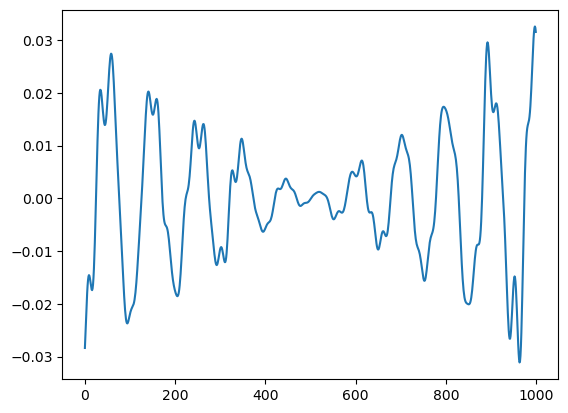

In [62]:
k = 0
plt.plot(xs_old[:,k] - xs_jax[:,k])
# plt.plot(xs_old[:,k])
# plt.plot(xs_jax[:,k])

In [64]:
res['zs_true'].shape

(500, 2, 25)